In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('player_stats_new.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Display the first few rows of the dataframe
df.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
0,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,1,zbwz6PibVlWAvAWGEE3rUZTYvESqxuUanwGihxqvZ_gbxj...,14115621,259,Renekton,NONE,TOP,12990,3,7,3,1,False,1,591,31231,37257,False,False,0,0,1,NaN,13691,502.340929,9160,9160,11,0,6,6,0,1,0,0.435813,0,-0.512532,0,155,0,0,60,0.0,1.0,0.00,94,35,87,9,225,4,5,14,5,1054,3071,6610,3047,3082,0,3340,19,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
1,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,2,MURFisAL-QkQYuP29A46W82uhINhXjn_bQejkrRTYCSd3y...,自不量力,453,LeeSin,NONE,JUNGLE,11416,2,8,6,1,False,6,10476,30342,32820,False,False,0,0,0,NaN,10349,379.722060,9252,8875,16,0,11,7,3,2,3,0.619423,1,-0.503849,138,24,105,6,4,62.0,1.0,12.00,143,95,110,7,355,4,3,11,14,6610,6692,2055,3044,0,3047,3340,19,0,0,2,2,11,1,0,2,3,9,0,0,0.0,1,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
2,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,3,FiWdBu5UKIzrBFXRaKHJecQGiBJAViksJqDpwfU1n6FhDj...,dead boi,147,Hwei,SOLO,MIDDLE,14658,1,8,4,1,False,2,4702,9004,15512,False,False,1,1,3,NaN,17485,641.527136,10707,9150,9,0,7,6,0,0,0,0.354309,0,-0.438275,0,247,0,0,83,0.0,1.0,71.00,103,59,39,5,206,12,4,4,3,1056,3020,2503,4645,1082,1058,3363,18,0,0,0,0,4,0,0,2,0,2,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
3,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,4,Pcdol-JqLyC57rniPjKMaJQoqEzIylpqI38-ycSDULdlWv...,Darth Goonius,1169,Kalista,CARRY,BOTTOM,10990,9,9,2,0,False,1,3460,13152,22780,False,False,1,1,1,NaN,18277,670.580127,12974,11650,21,0,7,4,0,4,0,0.772733,4,0.488423,4,179,2,0,57,0.0,1.0,17.00,57,10,115,4,186,21,6,4,4,1055,3153,3006,3124,3302,1057,3363,24,0,0,1,0,0,2,0,0,0,9,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
4,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,5,bAT6o5D-NmfhkIgN2SUVsIbTj5yURe6jl1ONfhJKXmkLlR...,marco,886,Thresh,SUPPORT,UTILITY,10000,1,4,10,0,False,4,0,17677,20320,False,False,0,0,1,NaN,10151,372.453868,7338,6850,52,0,23,21,2,4,2,1.917949,3,-0.138440,0,39,0,0,20,0.0,1.0,2.00,37,25,25,14,101,4,5,14,7,3158,3190,3876,3067,3109,0,3364,19,0,0,2,5,7,1,0,0,1,7,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
5,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,200,True,36,6,gbCgjzLqe8BS6_5YOsVHM5CWXar43jLe2wdV3iuX_eidrm...,uncle Urgy,142,Urgot,SOLO,TOP,15600,8,5,1,4,True,1,23130,35685,25218,True,False,3,4,3,939.722672,28616,1049.896140,13073,12650,24,0,9,9,0,6,0,0.894032,2,1.051415,0,222,0,

# Data Cleaning and Processing

## Game Version

Remove all games that are not from the most current season (Season 15)

In [4]:
df['gameVersion'].value_counts()

gameVersion
15.10.680.4378    26510
15.12.688.6522    23920
15.11.685.5259    21210
15.9.678.1456     14000
15.8.675.10       11440
                  ...  
14.13.596.4541       10
14.19.620.6549       10
13.21.539.4823       10
14.2.556.584         10
14.14.601.2857       10
Name: count, Length: 109, dtype: int64

In [5]:
df = df[~df['gameVersion'].str.startswith('13')]
df = df[~df['gameVersion'].str.startswith('14')]

In [6]:
df['gameVersion'].value_counts()

gameVersion
15.10.680.4378    26510
15.12.688.6522    23920
15.11.685.5259    21210
15.9.678.1456     14000
15.8.675.10       11440
15.4.657.5386      6570
15.7.670.3172      6430
15.6.668.2516      6220
15.7.672.4034      5860
15.5.662.6652      5770
15.2.652.1536      5560
15.1.649.4112      4660
15.3.656.4086      3460
15.3.654.407       3300
15.6.667.3303      3000
15.1.648.3927      2550
15.11.684.1658     2010
15.8.673.8244      1520
15.8.674.8619      1040
15.9.678.398        860
15.6.666.5757       530
15.6.667.359        450
15.7.669.24         320
15.6.664.9480       310
15.5.661.4445       220
15.2.650.9216       220
15.5.662.5311       160
15.6.666.9183       100
15.1.647.8644        60
15.9.677.4704        50
Name: count, dtype: int64

## Game Duration

Remove all game's with a shorter duration than 600 seconds (10 minutes is the first time a team can surrender, any surrender happening before 10 minutes means there has been a disconnected player and the game has been remade)

In [7]:
short_games = df[df['gameDuration'] < 600]
unique_short_games = short_games['matchId'].nunique()
unique_short_games

259

In [8]:
short_game_match_ids = df[df['gameDuration'] < 600]['matchId'].unique()
df = df[~df['matchId'].isin(short_game_match_ids)]

In [9]:
short_game_match_ids = df[df['gameDuration'] < 600]['matchId'].unique()
len(short_game_match_ids)

0

## NaN and Nulls

### Check for invalid team positons

In [10]:
# Check for games where teamPosition is not TOP, JUNGLE, MID, UTILITY, or BOTTOM
valid_positions = ['TOP', 'JUNGLE', 'MIDDLE', 'UTILITY', 'BOTTOM']
invalid_positions = df[~df['teamPosition'].isin(valid_positions)]

print(f"Number of rows with invalid teamPosition: {len(invalid_positions)}")

if len(invalid_positions) > 0:
    print("\nInvalid teamPosition values found:")
    print(invalid_positions['teamPosition'].value_counts())

Number of rows with invalid teamPosition: 3

Invalid teamPosition values found:
Series([], Name: count, dtype: int64)


In [11]:
valid_positions = ['TOP', 'JUNGLE', 'MIDDLE', 'UTILITY', 'BOTTOM']
invalid_positions = df[~df['teamPosition'].isin(valid_positions)]

# Show only the invalid matches
invalid_positions.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
24262,NA1_5310087298,889,CLASSIC,15.12.688.6522,11,False,True,100,False,9,3,JFF43mD4ZPMSOcjTNnN03f1YhRZR_1vyrlbzEkvS5Qdt1d...,KOIIIIIIIII,169,TwistedFate,SUPPORT,NaN,200,0,0,0,0,False,2,0,0,0,False,False,0,0,0,NaN,0,0.000000,2130,500,0,0,0,0,0,0,0,0.0,0,NaN,0,0,0,0,0,0.0,NaN,NaN,0,0,0,0,0,4,0,12,0,1056,2003,0,0,0,0,3340,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,False,False,False,0,0,0,0,0,0,3,1001,0,0,0
51000,NA1_5300031967,1047,CLASSIC,15.11.685.5259,11,False,False,100,False,11,1,rVcXkNecwng_CC7Cl-2AOZ0mmVJCYtnPMqCNxUOs4Gbsv3...,Monster Jelly,242,Zac,SUPPORT,NaN,573,0,0,0,0,False,1,0,581,0,False,False,0,0,0,NaN,0,0.000000,2432,500,0,0,0,0,0,0,0,0.0,0,NaN,0,0,0,0,0,0.0,NaN,NaN,0,0,0,0,0,4,0,12,0,1054,2003,0,0,0,0,3340,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,False,False,False,0,0,0,0,0,0,3,1001,0,0,0
74277,NA1_5235195790,967,CLASSIC,15.4.657.5386,11,False,True,200,False,5,8,JfBItTF_k5d-u324Ed0uJOzYjFHYiX7pVzRi6cc4CobW-n...,Middle,50,Kaisa,SUPPORT,NaN,2443,0,2,0,0,False,1,0,666,2223,False,False,0,0,0,NaN,147,9.125653,2646,1850,0,0,0,0,0,0,0,0.0,0,NaN,2,6,0,0,6,2.0,NaN,NaN,3,1,0,0,4,4,0,12,0,2003,1055,3070,3144,1036,2422,3340,6,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,False,False,False,0,0,0,0,0,0,1001,1001,0,0,0


In [12]:
len(df)

155720

In [13]:
# Remove the problematic match IDs
problematic_match_ids = ['NA1_5310087298', 'NA1_5300031967', 'NA1_5235195790']
df = df[~df['matchId'].isin(problematic_match_ids)]

In [14]:
len(df)

155690

### First Tower Kill Time

Only one team can get the first turret, so half of the dataset will have NaN as a value, those can be replaced by 0

In [15]:
df['firstTurretKilledTime'] = df['firstTurretKilledTime'].fillna(0)

### Missing CS, Vision, and Level advantage 

In [16]:
null_rows = df[df['maxLevelLeadLaneOpponent'].isnull() | df['maxCsAdvantageOnLaneOpponent'].isnull() | df['visionScoreAdvantageLaneOpponent'].isnull()]
print(f"Rows with null values in these columns: {len(null_rows)}")
print(null_rows[['matchId', 'riotIdGameName', 'championName', 'maxLevelLeadLaneOpponent', 'maxCsAdvantageOnLaneOpponent', 'visionScoreAdvantageLaneOpponent']])

Rows with null values in these columns: 0
Empty DataFrame
Columns: [matchId, riotIdGameName, championName, maxLevelLeadLaneOpponent, maxCsAdvantageOnLaneOpponent, visionScoreAdvantageLaneOpponent]
Index: []


In [17]:
target_match = df[df['matchId'] == 'NA1_5310087298']
target_match.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus


Most of these players with NaN are AFK, matchIds with these players can be removed

In [18]:
# Find matchIds where at least one player has NaN for CS, vision, or level advantage
problematic_match_ids = df[
    df['maxLevelLeadLaneOpponent'].isnull() | 
    df['maxCsAdvantageOnLaneOpponent'].isnull() | 
    df['visionScoreAdvantageLaneOpponent'].isnull()
]['matchId'].unique()

# Remove all rows with those matchIds
df = df[~df['matchId'].isin(problematic_match_ids)]

In [19]:
# Check for any columns with NaN or Null values
null_columns = []
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 0:
        null_columns.append((column, null_count))

# Sort by number of null values (descending)
null_columns.sort(key=lambda x: x[1], reverse=True)

print("Columns with null values:")
for column, count in null_columns:
    print(f"{column}: {count} null values")

if not null_columns:
    print("No columns have null values")

Columns with null values:
No columns have null values


## Duplicate Data 

In [20]:
# Count duplicate PUUIDs within a single matchId from the original df
duplicate_count = df.duplicated(subset=['matchId', 'puuid'], keep=False).sum()

print(f"Number of rows with duplicate PUUIDs within the same match: {duplicate_count}")

Number of rows with duplicate PUUIDs within the same match: 0


In [21]:
# Check for duplicate matchIds
total_matches = len(df)
unique_matches = df['matchId'].nunique()

print(f"Total rows: {total_matches}")
print(f"Unique matchIds: {unique_matches}")

Total rows: 155690
Unique matchIds: 15569


## Player/Champion Position Check

In [22]:
# Check top 10 most appeared champions
top_champions = df['championName'].value_counts().head(10)

print("Top 10 most appeared champions:")
print(top_champions)

Top 10 most appeared champions:
championName
Ezreal      2210
Viego       2200
Nami        2133
Lucian      2121
Kaisa       2071
Jhin        2031
Pantheon    2012
Senna       1940
Nautilus    1934
Zed         1903
Name: count, dtype: int64


In [23]:
# Check what teamPosition Blitzcrank has been played in
blitzcrank_positions = df[df['championName'] == 'Viego']['teamPosition'].value_counts()

print("Blitzcrank teamPosition distribution:")
print(blitzcrank_positions)

Blitzcrank teamPosition distribution:
teamPosition
JUNGLE     2133
TOP          30
MIDDLE       28
BOTTOM        6
UTILITY       3
Name: count, dtype: int64


In [24]:
len(df)

155690

## Remove unneeded columns

Columns used to verify data 

In [25]:
# Check if sightWardsBoughtInGame have any values in any row
sight_wards_count = df['sightWardsBoughtInGame'].sum()
print(f"Total sightWardsBoughtInGame across all rows: {sight_wards_count}")
rows_with_sight_wards = (df['sightWardsBoughtInGame'] > 0).sum()
print(f"Number of rows with sightWardsBoughtInGame > 0: {rows_with_sight_wards}")
# Check if hadOpenNexus have any values in any row
open_nexus_count = df['hadOpenNexus'].sum()
print(f"Total openNexus across all rows: {open_nexus_count}")
rows_with_open_nexus = (df['hadOpenNexus'] > 0).sum()
print(f"Number of rows with hadOpenNexus > 0: {rows_with_open_nexus}")
# Check if teamElderDragonKills have any values in any row
elder_dragon_count = df['teamElderDragonKills'].sum()
print(f"Total teamElderDragonKills across all rows: {elder_dragon_count}")
rows_with_elder_dragon = (df['teamElderDragonKills'] > 0).sum()
print(f"Number of rows with teamElderDragonKills > 0: {rows_with_open_nexus}")

Total sightWardsBoughtInGame across all rows: 0
Number of rows with sightWardsBoughtInGame > 0: 0
Total openNexus across all rows: 980
Number of rows with hadOpenNexus > 0: 980
Total teamElderDragonKills across all rows: 2570
Number of rows with teamElderDragonKills > 0: 980


In [26]:
df.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
0,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,1,zbwz6PibVlWAvAWGEE3rUZTYvESqxuUanwGihxqvZ_gbxj...,14115621,259,Renekton,NONE,TOP,12990,3,7,3,1,False,1,591,31231,37257,False,False,0,0,1,0.000000,13691,502.340929,9160,9160,11,0,6,6,0,1,0,0.435813,0,-0.512532,0,155,0,0,60,0.0,1.0,0.00,94,35,87,9,225,4,5,14,5,1054,3071,6610,3047,3082,0,3340,19,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
1,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,2,MURFisAL-QkQYuP29A46W82uhINhXjn_bQejkrRTYCSd3y...,自不量力,453,LeeSin,NONE,JUNGLE,11416,2,8,6,1,False,6,10476,30342,32820,False,False,0,0,0,0.000000,10349,379.722060,9252,8875,16,0,11,7,3,2,3,0.619423,1,-0.503849,138,24,105,6,4,62.0,1.0,12.00,143,95,110,7,355,4,3,11,14,6610,6692,2055,3044,0,3047,3340,19,0,0,2,2,11,1,0,2,3,9,0,0,0.0,1,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
2,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,3,FiWdBu5UKIzrBFXRaKHJecQGiBJAViksJqDpwfU1n6FhDj...,dead boi,147,Hwei,SOLO,MIDDLE,14658,1,8,4,1,False,2,4702,9004,15512,False,False,1,1,3,0.000000,17485,641.527136,10707,9150,9,0,7,6,0,0,0,0.354309,0,-0.438275,0,247,0,0,83,0.0,1.0,71.00,103,59,39,5,206,12,4,4,3,1056,3020,2503,4645,1082,1058,3363,18,0,0,0,0,4,0,0,2,0,2,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
3,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,4,Pcdol-JqLyC57rniPjKMaJQoqEzIylpqI38-ycSDULdlWv...,Darth Goonius,1169,Kalista,CARRY,BOTTOM,10990,9,9,2,0,False,1,3460,13152,22780,False,False,1,1,1,0.000000,18277,670.580127,12974,11650,21,0,7,4,0,4,0,0.772733,4,0.488423,4,179,2,0,57,0.0,1.0,17.00,57,10,115,4,186,21,6,4,4,1055,3153,3006,3124,3302,1057,3363,24,0,0,1,0,0,2,0,0,0,9,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
4,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,5,bAT6o5D-NmfhkIgN2SUVsIbTj5yURe6jl1ONfhJKXmkLlR...,marco,886,Thresh,SUPPORT,UTILITY,10000,1,4,10,0,False,4,0,17677,20320,False,False,0,0,1,0.000000,10151,372.453868,7338,6850,52,0,23,21,2,4,2,1.917949,3,-0.138440,0,39,0,0,20,0.0,1.0,2.00,37,25,25,14,101,4,5,14,7,3158,3190,3876,3067,3109,0,3364,19,0,0,2,5,7,1,0,0,1,7,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
5,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,200,True,36,6,gbCgjzLqe8BS6_5YOsVHM5CWXar43jLe2wdV3iuX_eidrm...,uncle Urgy,142,Urgot,SOLO,TOP,15600,8,5,1,4,True,1,23130,35685,25218,True,False,3,4,3,939.722672,28616,1049.896140,13073,12650,24,0,9,9,0,6,0,0.8

In [27]:
# Create a new df from the original df called cleaned_df, and remove unneeded columns
cleaned_df = df.drop(['puuid', 'gameMode', 'mapId', 'role', 'sightWardsBoughtInGame', 'gameVersion', 'detectorWardsPlaced'], axis=1)

print(f"Original df shape: {df.shape}")
print(f"Cleaned df shape: {cleaned_df.shape}")

Original df shape: (155690, 100)
Cleaned df shape: (155690, 93)


In [28]:
cleaned_df.head(10)

,matchId,gameDuration,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,riotIdGameName,summonerLevel,championName,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
0,NA1_5310002423,1635,False,False,100,False,16,1,14115621,259,Renekton,TOP,12990,3,7,3,1,False,1,591,31231,37257,False,False,0,0,1,0.000000,13691,502.340929,9160,9160,11,6,6,0,1,0.435813,0,-0.512532,0,155,0,0,60,0.0,1.0,0.00,94,35,87,9,225,4,5,14,5,1054,3071,6610,3047,3082,0,3340,19,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
1,NA1_5310002423,1635,False,False,100,False,16,2,自不量力,453,LeeSin,JUNGLE,11416,2,8,6,1,False,6,10476,30342,32820,False,False,0,0,0,0.000000,10349,379.722060,9252,8875,16,11,7,3,2,0.619423,1,-0.503849,138,24,105,6,4,62.0,1.0,12.00,143,95,110,7,355,4,3,11,14,6610,6692,2055,3044,0,3047,3340,19,0,0,2,2,11,1,0,2,3,9,0,0,0.0,1,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
2,NA1_5310002423,1635,False,False,100,False,16,3,dead boi,147,Hwei,MIDDLE,14658,1,8,4,1,False,2,4702,9004,15512,False,False,1,1,3,0.000000,17485,641.527136,10707,9150,9,7,6,0,0,0.354309,0,-0.438275,0,247,0,0,83,0.0,1.0,71.00,103,59,39,5,206,12,4,4,3,1056,3020,2503,4645,1082,1058,3363,18,0,0,0,0,4,0,0,2,0,2,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
3,NA1_5310002423,1635,False,False,100,False,16,4,Darth Goonius,1169,Kalista,BOTTOM,10990,9,9,2,0,False,1,3460,13152,22780,False,False,1,1,1,0.000000,18277,670.580127,12974,11650,21,7,4,0,4,0.772733,4,0.488423,4,179,2,0,57,0.0,1.0,17.00,57,10,115,4,186,21,6,4,4,1055,3153,3006,3124,3302,1057,3363,24,0,0,1,0,0,2,0,0,0,9,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
4,NA1_5310002423,1635,False,False,100,False,16,5,marco,886,Thresh,UTILITY,10000,1,4,10,0,False,4,0,17677,20320,False,False,0,0,1,0.000000,10151,372.453868,7338,6850,52,23,21,2,4,1.917949,3,-0.138440,0,39,0,0,20,0.0,1.0,2.00,37,25,25,14,101,4,5,14,7,3158,3190,3876,3067,3109,0,3364,19,0,0,2,5,7,1,0,0,1,7,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
5,NA1_5310002423,1635,False,False,200,True,36,6,uncle Urgy,142,Urgot,TOP,15600,8,5,1,4,True,1,23130,35685,25218,True,False,3,4,3,939.722672,28616,1049.896140,13073,12650,24,9,9,0,6,0.894032,2,1.051415,0,222,0,0,73,0.0,2.0,71.00,59,376,25,13,473,4,3,12,4,1055,3071,3174,3053,3083,2021,3340,23,0,1,1,6,10,0,0,2,0,19,0,0,11.0,0,True,True,True,1,2,0,1,0,3,3,0,1,0,0
6,NA1_5310002423,1635,False,False,200,True,36,7,tibs,552,Poppy,JUNGLE,15885,6,2,18,0,False,7,39937,44356,29302,False,False,0,3,0,939.722672,21419,785.853019,12497,11050,34,14,8,6,3,1.248457,4,1.015517,171,10,94,24,3,56.0,3.0,30.75,174,59,59,8,300,11,15,4,3,6662,4401,0,3171,0,3071,3340,23,0,0,3,5,3,2,0,0,0,46,0,0,2.0,0,True,True,True,1,2,4,1,0,3,3,0,1,0,0
7,NA1_5310002423,1635,False,False,200,True,36,8,xExplosive,6

# EDA (Performance Metric By Role)

1. Kills/Deaths/Assists
    - Solo Kills
    - First Blood Kills
    - Damage Per Minute
2. Creep Score
    - Neutral and Jungle Minions
    - Total Ally and Total Enemy Jungle Minions Killed 
    - Lane Minions and Jungle CS Before 10 Minutes
    - Max Cs Advantage On Lane Opponent
3. Objectives (First/Total Count/Damage Dealt)
    - Tower / First Tower Kill Time / Turret Plates Taken
    - Baron / Dragon / Atakhan / Rift Herald
    - Objective Stolen
4. Vision
    - Vision Score 
    - Wards Placed (Stealth Wards + Control Wards)
    - Stealth Wards Placed 
    - Control Wards Placed
    - Ward Take Down Before 20 Minutes
    - Vision Score Advantage Over Lane Opponent
5. Communication
    - Types of Pings
    - Ping Count (Aggregated and Normalized by Duration)

## Kills Deaths Assists

### Solo Kills

Total games: 155690
Games with solo kills: 76447
Percentage with solo kills: 49.10%

Solo Kills by Win/Loss:
       count   mean    std
win                       
False  77850  0.782  1.187
True   77840  1.200  1.594

Win Rate by Solo Kill Count (min 50 games):
           Games  Win_Rate
soloKills                 
0          79243     0.447
1          37959     0.498
2          19020     0.561
3           9542     0.614
4           4945     0.663
5           2473     0.734
6           1240     0.746
7            651     0.737
8            307     0.801
9            181     0.812
10            69     0.812

Solo Kills by Position:
              count   mean
teamPosition              
BOTTOM        31138  0.611
JUNGLE        31138  0.944
MIDDLE        31138  1.410
TOP           31138  1.782
UTILITY       31138  0.208

Top 10 Champions by Solo Kills (min 50 games):
              count   mean
championName              
Akali          1350  2.467
Fiora          1039  2.365
Akshan          5

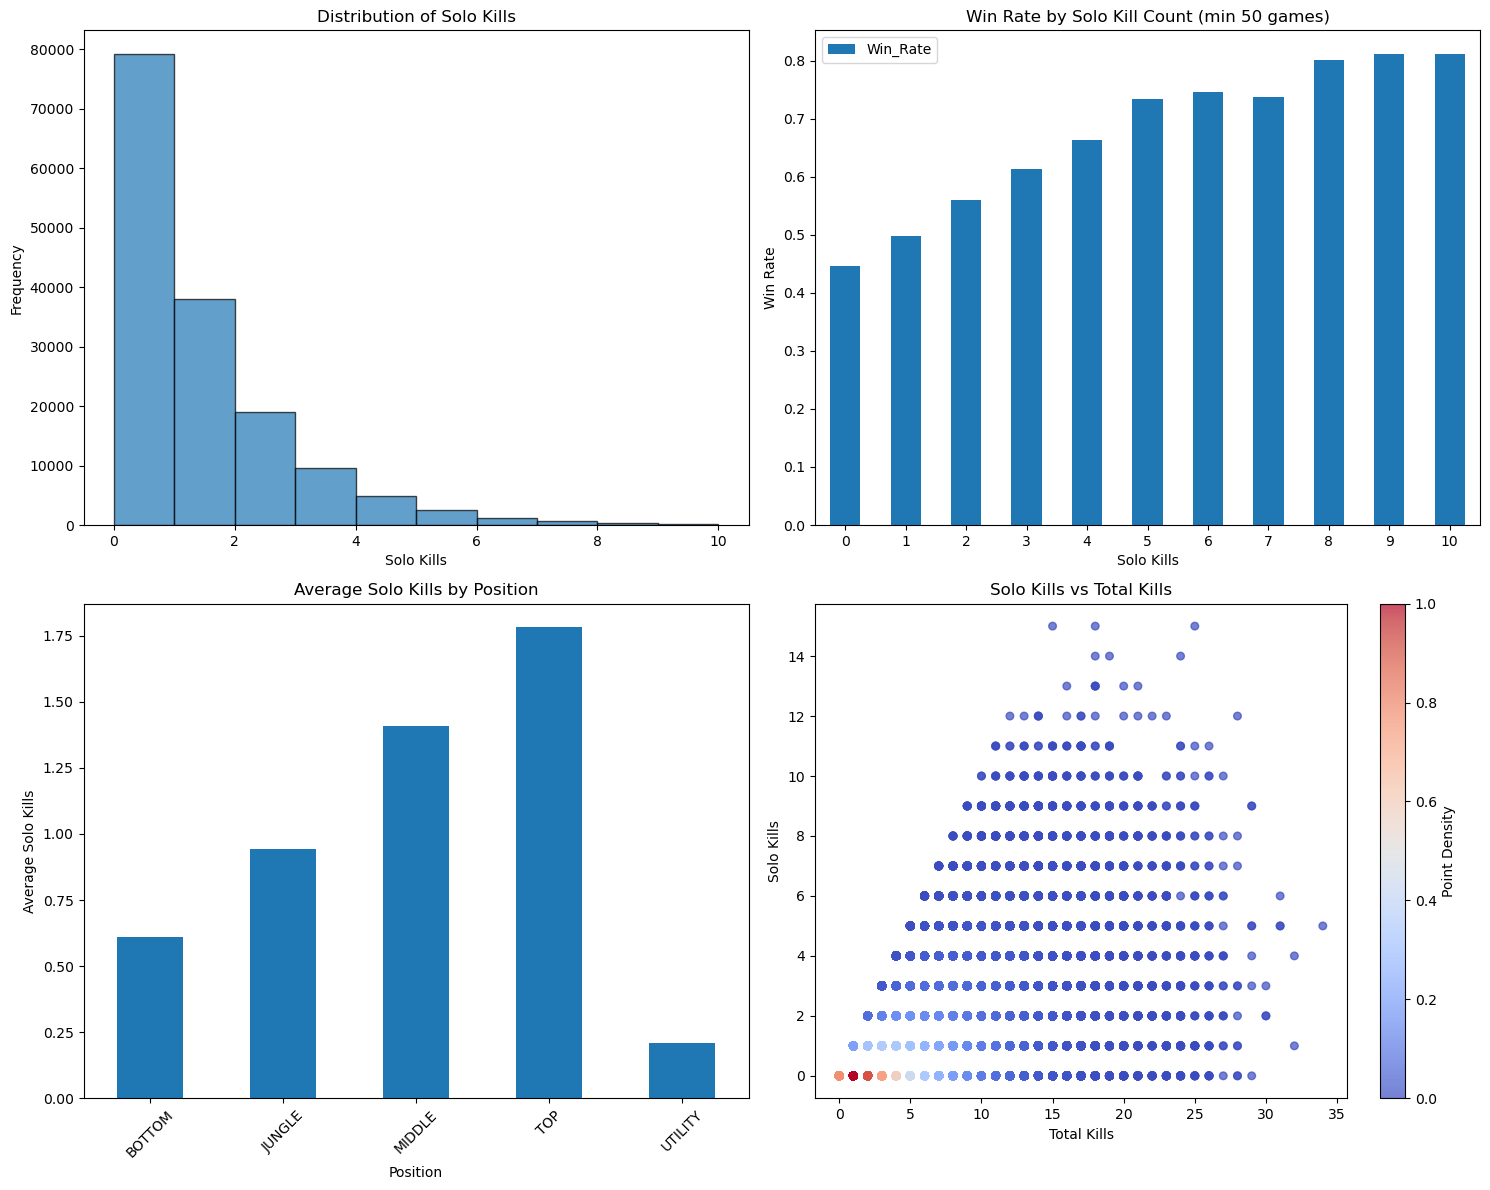

In [29]:
# Solo Kills Correlation with Win Rate EDA
print(f"Total games: {len(cleaned_df)}")
print(f"Games with solo kills: {(cleaned_df['soloKills'] > 0).sum()}")
print(f"Percentage with solo kills: {(cleaned_df['soloKills'] > 0).mean() * 100:.2f}%")

# Solo kills by win/loss
win_loss_solo = cleaned_df.groupby('win')['soloKills'].agg(['count', 'mean', 'std']).round(3)
print(f"\nSolo Kills by Win/Loss:")
print(win_loss_solo)

# --- Changes are here ---
# Win rate by solo kill count
solo_kill_win_rates = cleaned_df.groupby('soloKills')['win'].agg(['count', 'mean']).round(3)
solo_kill_win_rates.columns = ['Games', 'Win_Rate']
# Filter for statistical significance
solo_kill_win_rates = solo_kill_win_rates[solo_kill_win_rates['Games'] >= 50]
print(f"\nWin Rate by Solo Kill Count (min 50 games):")
print(solo_kill_win_rates)
# --- End of changes ---

# Solo kills by position
position_solo = cleaned_df.groupby('teamPosition')['soloKills'].agg(['count', 'mean']).round(3)
print(f"\nSolo Kills by Position:")
print(position_solo)

# Top champions by solo kills (min 50 games)
champ_solo = cleaned_df.groupby('championName')['soloKills'].agg(['count', 'mean']).round(3)
champ_solo_filtered = champ_solo[champ_solo['count'] >= 50].sort_values('mean', ascending=False)
print(f"\nTop 10 Champions by Solo Kills (min 50 games):")
print(champ_solo_filtered.head(10))

# Correlation with other metrics
correlation_columns = ['soloKills', 'kills', 'deaths', 'assists', 'damagePerMinute', 'totalDamageDealtToChampions', 'goldEarned']
correlation_matrix = cleaned_df[correlation_columns].corr()
print(f"\nCorrelation with Solo Kills:")
print(correlation_matrix['soloKills'].sort_values(ascending=False))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Solo kills distribution
axes[0,0].hist(cleaned_df['soloKills'], bins=range(0, 11), alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Solo Kills')
axes[0,0].set_xlabel('Solo Kills')
axes[0,0].set_ylabel('Frequency')

# 2. Win rate by solo kills (now uses the filtered data)
solo_kill_win_rates.plot(kind='bar', ax=axes[0,1], y='Win_Rate')
axes[0,1].set_title('Win Rate by Solo Kill Count (min 50 games)')
axes[0,1].set_xlabel('Solo Kills')
axes[0,1].set_ylabel('Win Rate')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Solo kills by position
position_solo['mean'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Solo Kills by Position')
axes[1,0].set_xlabel('Position')
axes[1,0].set_ylabel('Average Solo Kills')
axes[1,0].tick_params(axis='x', rotation=45)


# 4. Solo kills vs total kills scatter with density coloring
from scipy.stats import gaussian_kde

x = cleaned_df['kills']
y = cleaned_df['soloKills']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Normalize z to spread colors more evenly
z_normalized = (z - z.min()) / (z.max() - z.min())

scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='coolwarm')
axes[1,1].set_title('Solo Kills vs Total Kills')
axes[1,1].set_xlabel('Total Kills')
axes[1,1].set_ylabel('Solo Kills')

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Point Density')


plt.tight_layout()
plt.show()

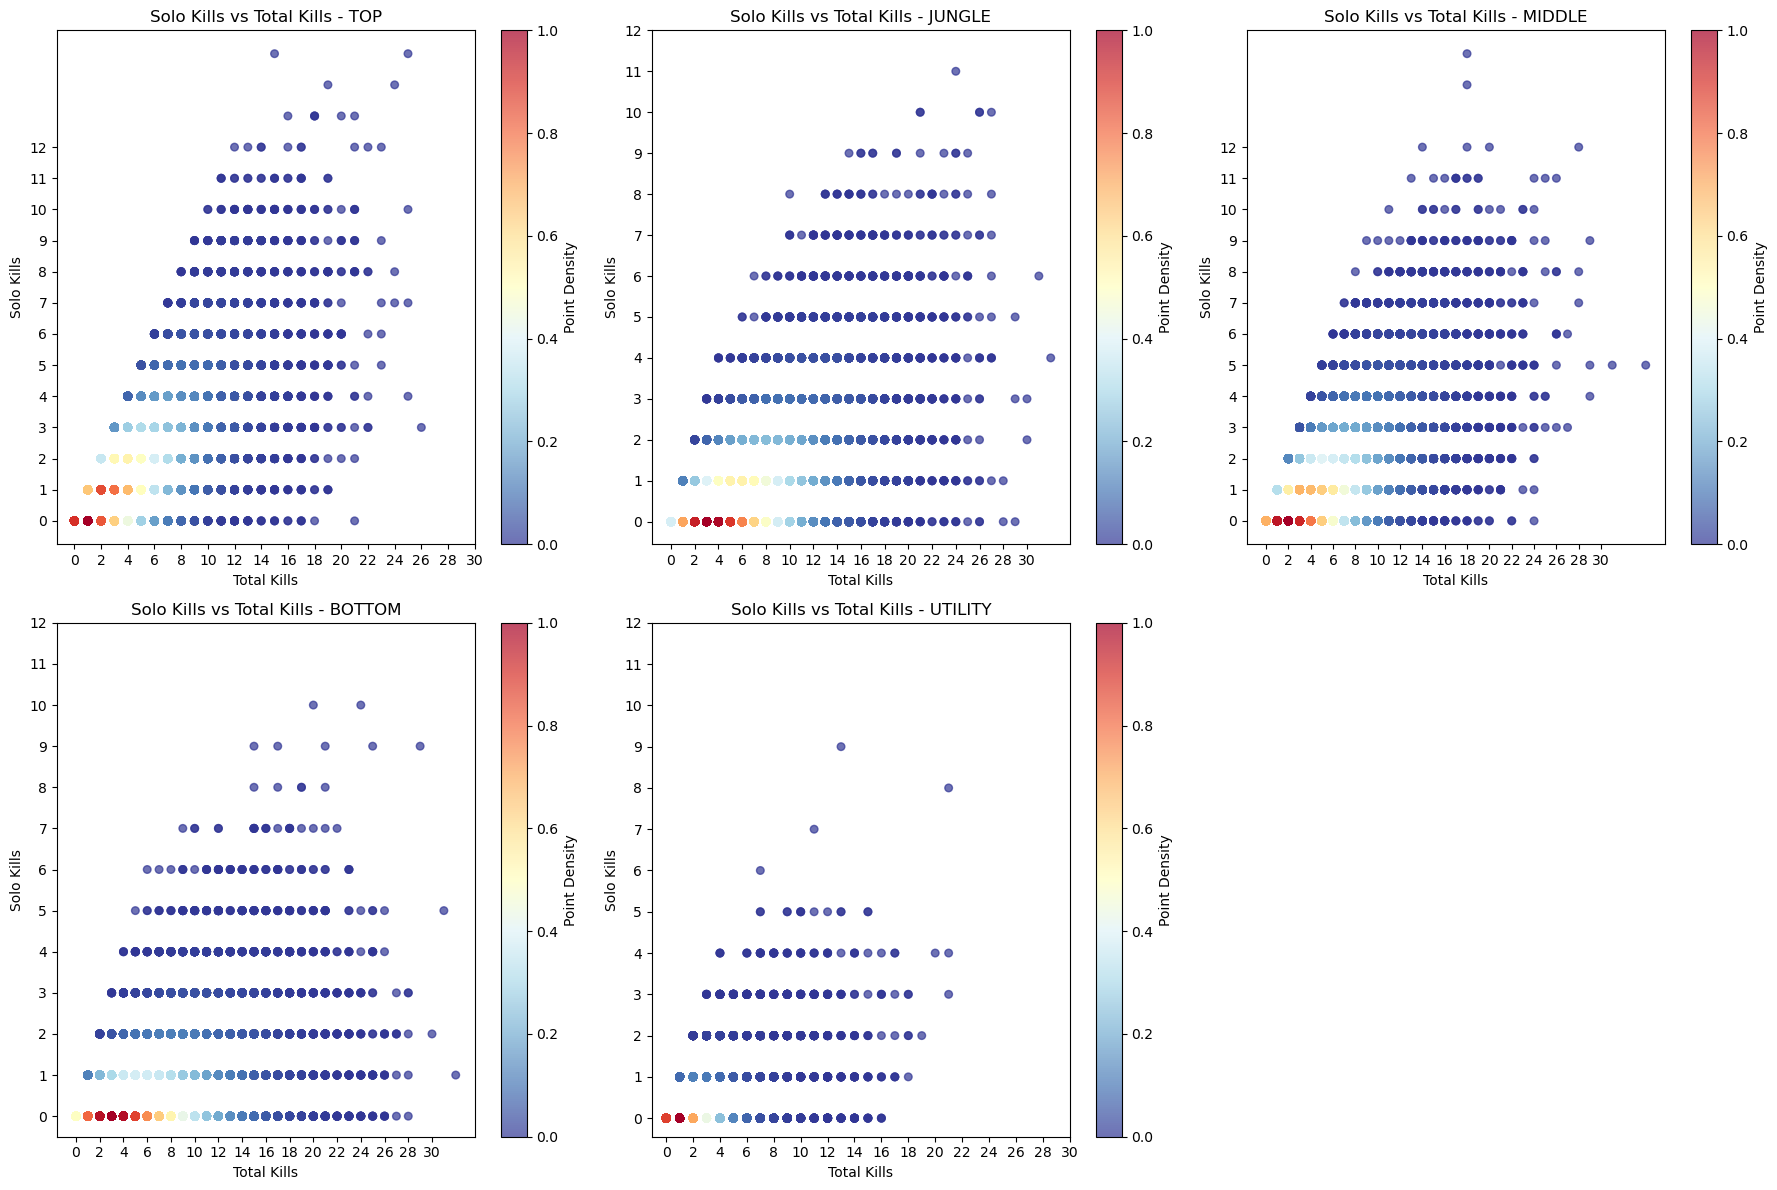

In [30]:
# Solo kills vs total kills scatter by position
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
positions = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']


# Option 1: Use 'viridis' for better contrast
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='viridis')

# Option 2: Use 'plasma' for bright colors
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='plasma')

# Option 3: Use 'hot' for fire-like colors (dark to bright)
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='hot')

# Option 4: Use 'RdYlBu_r' (red-yellow-blue reversed) for better contrast
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='RdYlBu_r')

for i, position in enumerate(positions):
    row = i // 3
    col = i % 3
    
    pos_data = cleaned_df[cleaned_df['teamPosition'] == position]
    x = pos_data['kills']
    y = pos_data['soloKills']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    z_normalized = (z - z.min()) / (z.max() - z.min())
    
    scatter = axes[row, col].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='RdYlBu_r')
    axes[row, col].set_title(f'Solo Kills vs Total Kills - {position}')
    axes[row, col].set_xlabel('Total Kills')
    axes[row, col].set_ylabel('Solo Kills')
    axes[row, col].set_xticks(range(0, 32, 2))
    axes[row, col].set_yticks(range(0, 13, 1))
    
    cbar = plt.colorbar(scatter, ax=axes[row, col])
    cbar.set_label('Point Density')

# Remove the empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

In [31]:
# Group by position and solo kills, then calculate win rate and game count
win_rate_by_lane_solo_kills = cleaned_df.groupby(['teamPosition', 'soloKills'])['win'].agg(['mean', 'count']).round(3)

# Rename columns for clarity
win_rate_by_lane_solo_kills.columns = ['Win_Rate', 'Games']

# Display the results for each position
print("=== Win Rate by Solo Kills for Each Lane ===\n")

# Get unique positions sorted for consistent output
positions = sorted(cleaned_df['teamPosition'].unique())

for position in positions:
    print(f"--- {position} ---")
    
    # Use .loc to select data for the current position from the multi-index
    position_data = win_rate_by_lane_solo_kills.loc[position]
    
    # Display the win rates, filtering for a reasonable number of games to ensure statistical significance
    print(position_data[position_data['Games'] >= 20])
    print("\n" + "="*30 + "\n")

=== Win Rate by Solo Kills for Each Lane ===

--- BOTTOM ---
           Win_Rate  Games
soloKills                 
0             0.459  18874
1             0.529   7949
2             0.601   2779
3             0.654    990
4             0.686    338
5             0.770    122
6             0.731     52
7             0.773     22


--- JUNGLE ---
           Win_Rate  Games
soloKills                 
0             0.428  14735
1             0.513   8994
2             0.593   4214
3             0.647   1817
4             0.686    810
5             0.736    307
6             0.729    144
7             0.710     69
8             0.800     30


--- MIDDLE ---
           Win_Rate  Games
soloKills                 
0             0.394  11116
1             0.486   8620
2             0.558   5305
3             0.605   2907
4             0.668   1578
5             0.742    783
6             0.754    418
7             0.790    224
8             0.804    107
9             0.783     46


--- TOP ---


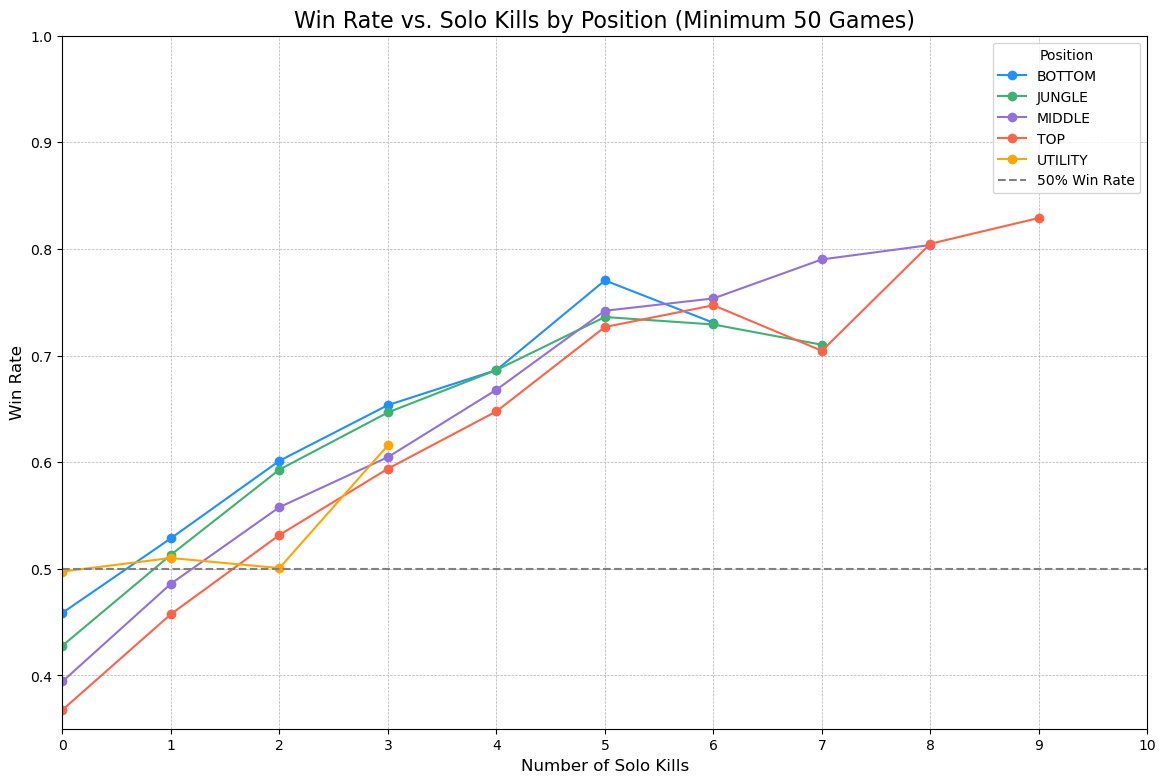

In [32]:
# Group data by position and solo kills to calculate win rate and game count
win_rate_by_lane = cleaned_df.groupby(['teamPosition', 'soloKills'])['win'].agg(['mean', 'count']).reset_index()
win_rate_by_lane.columns = ['teamPosition', 'soloKills', 'Win_Rate', 'Games']

# Set up the plot
plt.figure(figsize=(14, 9))
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

# Plot a line for each position
for position in positions:
    # Filter data for the current position and ensure a minimum number of games for statistical relevance
    position_data = win_rate_by_lane[
        (win_rate_by_lane['teamPosition'] == position) & 
        (win_rate_by_lane['Games'] >= 50)
    ]
    
    if not position_data.empty:
        plt.plot(position_data['soloKills'], position_data['Win_Rate'], marker='o', linestyle='-', label=position, color=colors.get(position, 'black'))

# Add plot details
plt.title('Win Rate vs. Solo Kills by Position (Minimum 50 Games)', fontsize=16)
plt.xlabel('Number of Solo Kills', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
plt.legend(title='Position')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Changes are here ---
# Set x-axis ticks to go from 0 to 10
plt.xticks(range(0, 11))
# Set the x-axis limit to stop at 10
plt.xlim(0, 10)
# --- End of changes ---

plt.ylim(0.35, 1.0)
plt.show()

**Key Takeaways:**
- Top has the highest number of solo kills due to top being the most isolated lane
- Bottom and Utility both have the lowest, as it is the only lane where there are two players 

### First Blood Kill

=== First Blood Kill Impact on Win Rate ===

--- Overall Win Rate by First Blood ---
                         Win_Rate   Games
Did Not Get First Blood     0.492  140238
Got First Blood             0.572   15452


--- Win Rate by Position for Getting First Blood ---
              Win_Rate_with_FB  First_Bloods
teamPosition                                
JUNGLE                   0.593          3458
TOP                      0.572          3298
BOTTOM                   0.567          3937
MIDDLE                   0.564          2893
UTILITY                  0.557          1866


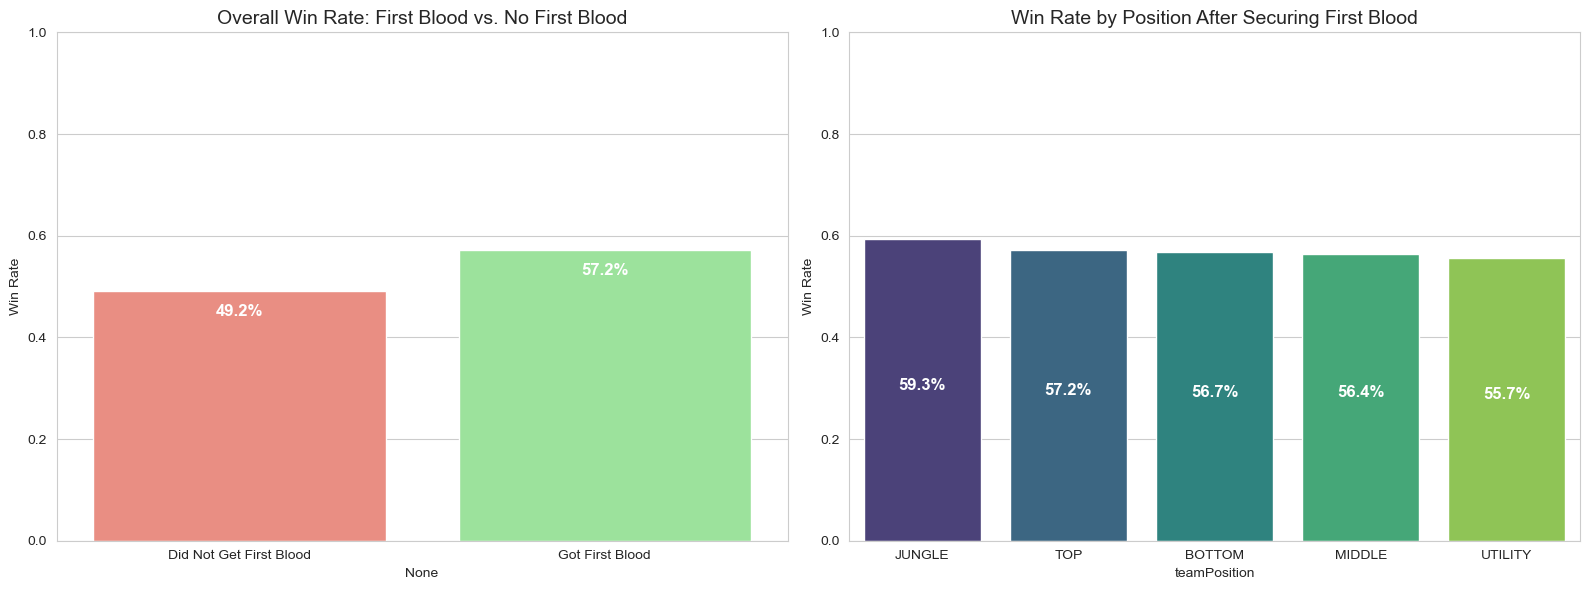

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Overall First Blood Impact ---
print("=== First Blood Kill Impact on Win Rate ===\n")

# Calculate win rate for players who got first blood vs. those who didn't
fb_win_rate = cleaned_df.groupby('firstBloodKill')['win'].agg(['mean', 'count']).round(3)
fb_win_rate.columns = ['Win_Rate', 'Games']
fb_win_rate.index = ['Did Not Get First Blood', 'Got First Blood']

print("--- Overall Win Rate by First Blood ---")
print(fb_win_rate)
print("\n" + "="*40 + "\n")


# --- 2. First Blood Impact by Position ---
print("--- Win Rate by Position for Getting First Blood ---")

# Group by position for players who secured first blood
fb_by_position = cleaned_df[cleaned_df['firstBloodKill'] == True].groupby('teamPosition')['win'].agg(['mean', 'count']).round(3)
fb_by_position.columns = ['Win_Rate_with_FB', 'First_Bloods']
fb_by_position = fb_by_position.sort_values('Win_Rate_with_FB', ascending=False)

print(fb_by_position)


# --- 3. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# Bar chart for overall win rate
# --- FIX: Updated to modern seaborn standard ---
sns.barplot(x=fb_win_rate.index, y=fb_win_rate['Win_Rate'], ax=axes[0], hue=fb_win_rate.index, palette=['salmon', 'lightgreen'], legend=False)
axes[0].set_title('Overall Win Rate: First Blood vs. No First Blood', fontsize=14)
axes[0].set_ylabel('Win Rate')
axes[0].set_ylim(0, 1.0)
# Add percentage labels
for index, value in enumerate(fb_win_rate['Win_Rate']):
    axes[0].text(index, value - 0.05, f'{value:.1%}', ha='center', color='white', fontsize=12, weight='bold')


# Bar chart for win rate by position
# --- FIX: Updated to modern seaborn standard ---
sns.barplot(x=fb_by_position.index, y=fb_by_position['Win_Rate_with_FB'], ax=axes[1], hue=fb_by_position.index, palette='viridis', legend=False)
axes[1].set_title('Win Rate by Position After Securing First Blood', fontsize=14)
axes[1].set_ylabel('Win Rate')
axes[1].set_ylim(0, 1.0)
# Add percentage labels
for index, value in enumerate(fb_by_position['Win_Rate_with_FB']):
    axes[1].text(index, value / 2, f'{value:.1%}', ha='center', color='white', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


**Key Takeaway**
- Teams/players that gets first Blood has a 57.2% Win Rate
- The highest win rate is Jungle, 59.3% Win Rate after getting first blood. This can be explained by jungler's ability to control more of the map while being ahead

### Damage Per Minute

=== Damage Per Minute (DPM) Correlation with Win Rate ===

--- Average DPM in Wins vs. Losses ---
        mean     std
Loss  613.17  286.31
Win   749.91  334.11


--- Average DPM by Position ---
teamPosition
BOTTOM     797.34
MIDDLE     790.12
TOP        760.55
JUNGLE     682.73
UTILITY    376.96
Name: damagePerMinute, dtype: float64


--- Win Rate Across DPM Ranges (min 50 games) ---
           Win_Rate  Games
dpm_bins                  
0-200         0.318   4453
201-400       0.399  27982
401-600       0.416  35801
601-800       0.494  36920
801-1000      0.586  26224
1001-1200     0.658  14111
1200+         0.736  10199




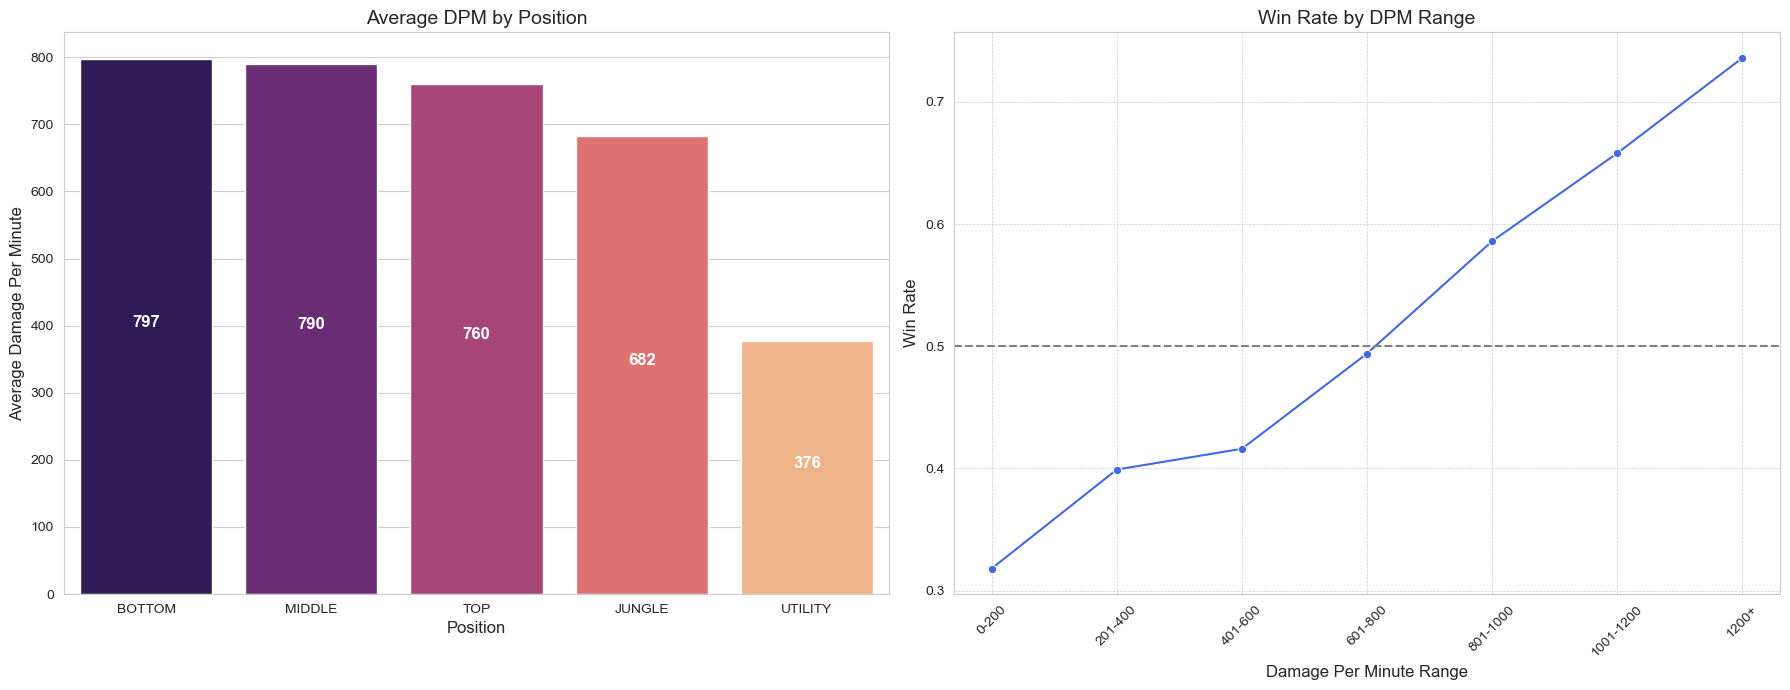

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Overall DPM for Wins vs. Losses ---
print("=== Damage Per Minute (DPM) Correlation with Win Rate ===\n")

# Calculate average DPM for winning and losing games
dpm_win_loss = cleaned_df.groupby('win')['damagePerMinute'].agg(['mean', 'std']).round(2)
dpm_win_loss.index = ['Loss', 'Win']

print("--- Average DPM in Wins vs. Losses ---")
print(dpm_win_loss)
print("\n" + "="*40 + "\n")


# --- 2. DPM by Position ---
print("--- Average DPM by Position ---")

# Calculate the average DPM for each role
dpm_by_position = cleaned_df.groupby('teamPosition')['damagePerMinute'].mean().round(2).sort_values(ascending=False)

print(dpm_by_position)
print("\n" + "="*40 + "\n")


# --- 3. Win Rate by DPM Bins ---
print("--- Win Rate Across DPM Ranges (min 50 games) ---")

# Create DPM bins to analyze win rate across different damage brackets
bins = [0, 200, 400, 600, 800, 1000, 1200, np.inf]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1200+']
cleaned_df['dpm_bins'] = pd.cut(cleaned_df['damagePerMinute'], bins=bins, labels=labels, right=False)

# Calculate win rate for each DPM bin
# --- FIX: Added observed=False to silence the warning and maintain current behavior ---
win_rate_by_dpm = cleaned_df.groupby('dpm_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_dpm.columns = ['Win_Rate', 'Games']
# Filter for bins with enough games to be statistically significant
win_rate_by_dpm = win_rate_by_dpm[win_rate_by_dpm['Games'] >= 50]

print(win_rate_by_dpm)
print("\n" + "="*40 + "\n")

# --- 5. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Bar chart for DPM by position
sns.barplot(x=dpm_by_position.index, y=dpm_by_position.values, ax=axes[0], hue=dpm_by_position.index, palette='magma', legend=False)
axes[0].set_title('Average DPM by Position', fontsize=14)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Average Damage Per Minute', fontsize=12)
for index, value in enumerate(dpm_by_position.values):
    axes[0].text(index, value / 2, f'{int(value)}', ha='center', color='white', fontsize=12, weight='bold')


# Line plot for Win Rate by DPM Bins
sns.lineplot(x=win_rate_by_dpm.index, y=win_rate_by_dpm['Win_Rate'], ax=axes[1], marker='o', color='royalblue')
axes[1].set_title('Win Rate by DPM Range', fontsize=14)
axes[1].set_xlabel('Damage Per Minute Range', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()


**Key Takeaways**
- Bottom lane has th3e highest average damage per minute. Most champions are ranged in this category, and their identity is to deal damage (Attack Damage Carry)
- There is a steep upwards trend with higher DPM and Win Rate

### Kills Deaths and Assists

=== KDA Correlation with Win Rate ===

--- Average KDA in Wins vs. Losses ---
      kills  deaths  assists
Loss   4.15    6.62     6.09
Win    6.60    4.17    10.11


--- Average KDA by Position ---
              kills  deaths  assists
teamPosition                        
BOTTOM         6.57    5.49     6.95
JUNGLE         7.08    5.19     7.95
MIDDLE         6.01    5.28     6.58
TOP            4.97    5.46     5.39
UTILITY        2.26    5.56    13.63


--- Win Rate by Binned Stats (min 50 games) ---

Kills:
           Win_Rate  Games
kill_bins                 
0             0.269  11392
1-2           0.356  34605
3-4           0.434  32427
5-6           0.525  25872
7-8           0.600  19211
9-10          0.670  13060
11+           0.759  19123

Deaths:
            Win_Rate  Games
death_bins                 
0              0.949   4786
1-2            0.839  23163
3-4            0.621  36272
5-6            0.432  38595
7-8            0.309  28808
9-10           0.248  15541
11+     

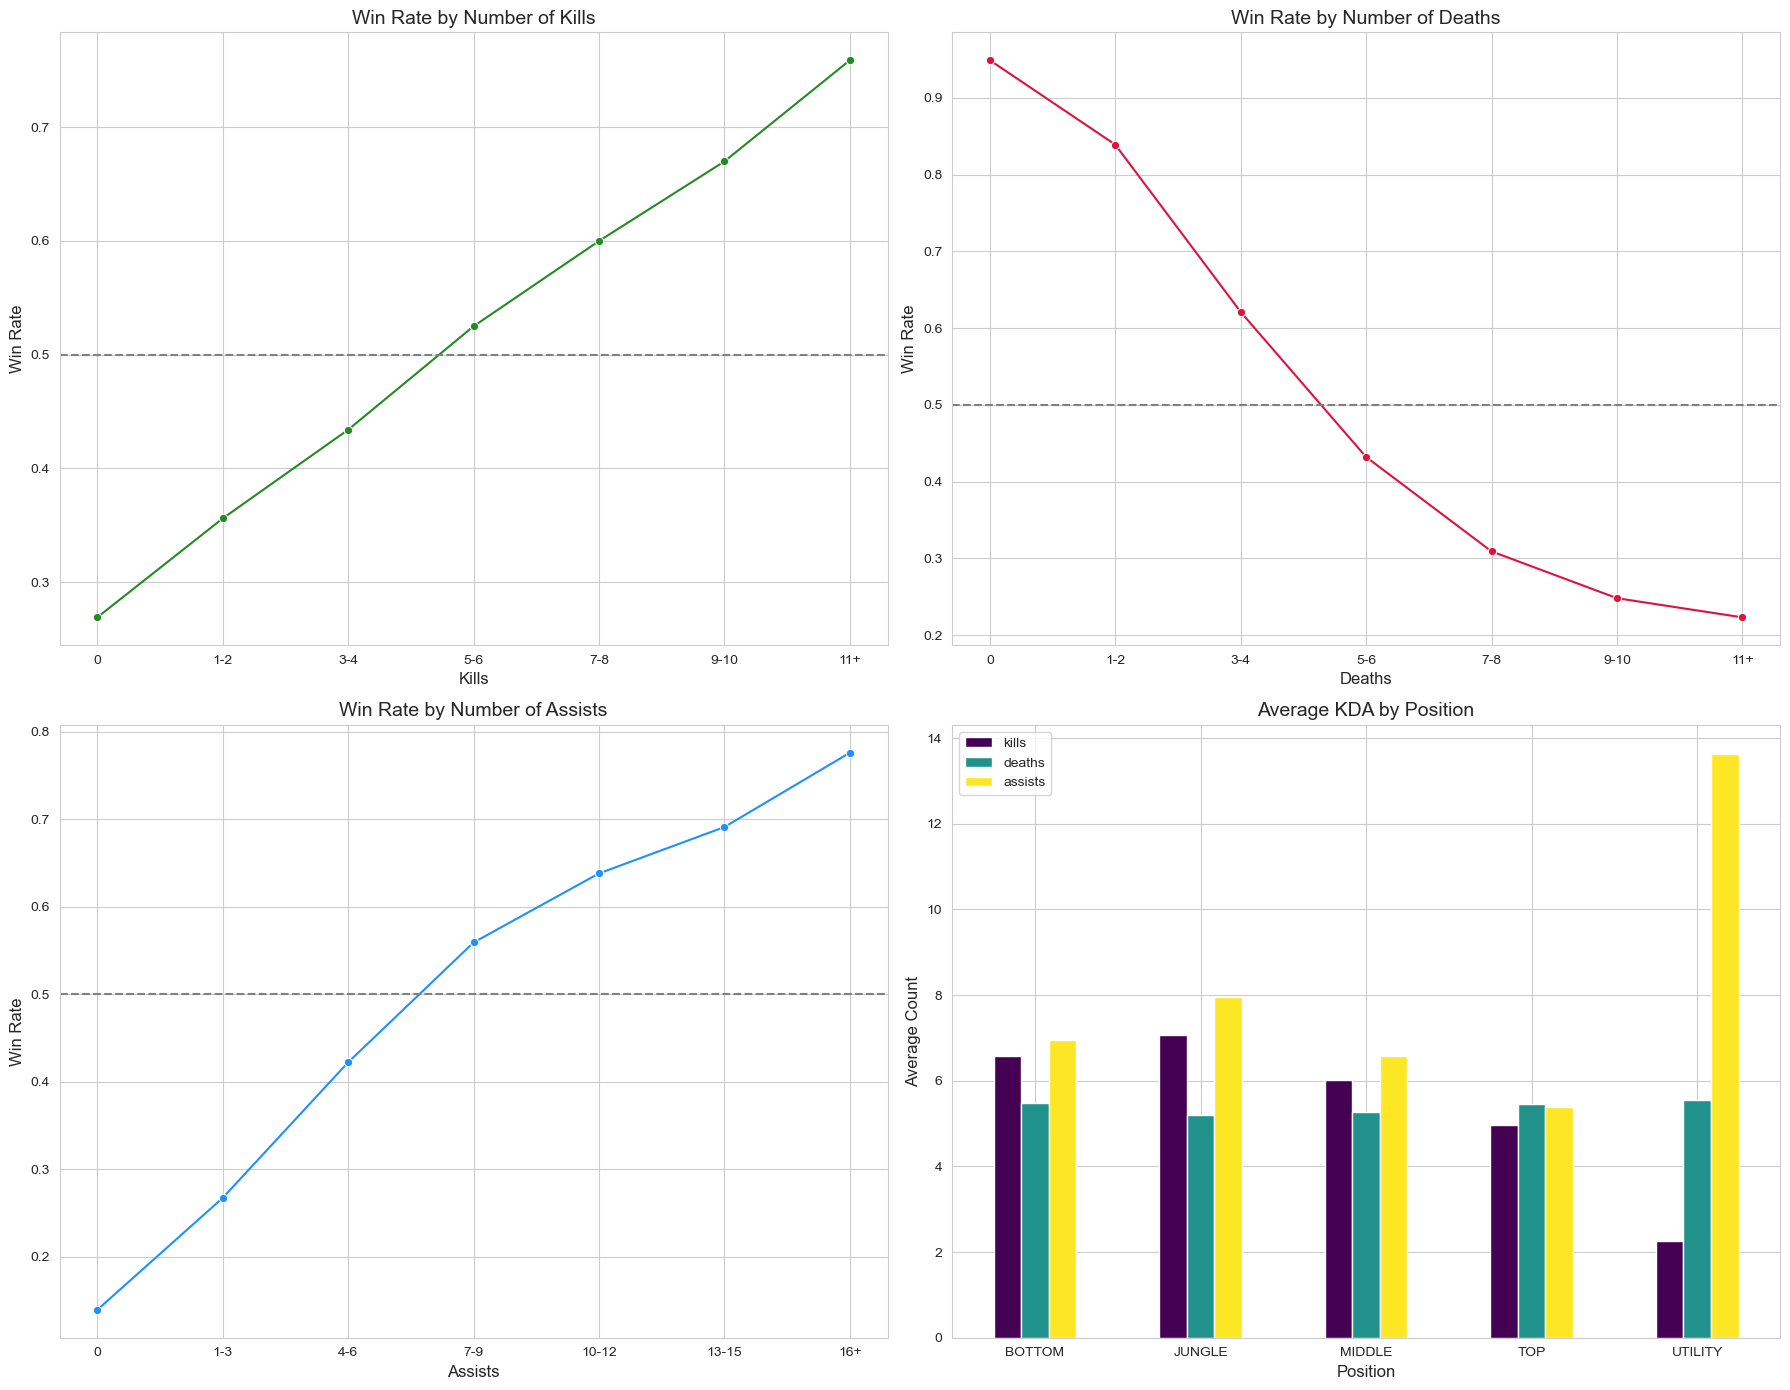

In [46]:
# --- 1. Overall KDA for Wins vs. Losses ---
print("=== KDA Correlation with Win Rate ===\n")

# Calculate the average KDA for winning and losing games
kda_win_loss = cleaned_df.groupby('win')[['kills', 'deaths', 'assists']].mean().round(2)
kda_win_loss.index = ['Loss', 'Win']

print("--- Average KDA in Wins vs. Losses ---")
print(kda_win_loss)
print("\n" + "="*40 + "\n")


# --- 2. KDA by Position ---
print("--- Average KDA by Position ---")

# Calculate the average KDA for each role
kda_by_position = cleaned_df.groupby('teamPosition')[['kills', 'deaths', 'assists']].mean().round(2)

print(kda_by_position)
print("\n" + "="*40 + "\n")


# --- 3. Win Rate by KDA Bins ---
# We create bins for each stat to see how win probability changes as they increase.

# Kills Bins
bins_k = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_k = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['kill_bins'] = pd.cut(cleaned_df['kills'], bins=bins_k, labels=labels_k, right=True)
win_rate_by_kills = cleaned_df.groupby('kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_kills.columns = ['Win_Rate', 'Games']

# Deaths Bins
bins_d = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_d = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['death_bins'] = pd.cut(cleaned_df['deaths'], bins=bins_d, labels=labels_d, right=True)
win_rate_by_deaths = cleaned_df.groupby('death_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_deaths.columns = ['Win_Rate', 'Games']

# Assists Bins
bins_a = [-1, 0, 3, 6, 9, 12, 15, np.inf]
labels_a = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16+']
cleaned_df['assist_bins'] = pd.cut(cleaned_df['assists'], bins=bins_a, labels=labels_a, right=True)
win_rate_by_assists = cleaned_df.groupby('assist_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_assists.columns = ['Win_Rate', 'Games']

print("--- Win Rate by Binned Stats (min 50 games) ---")
print("\nKills:")
print(win_rate_by_kills[win_rate_by_kills['Games'] >= 50])
print("\nDeaths:")
print(win_rate_by_deaths[win_rate_by_deaths['Games'] >= 50])
print("\nAssists:")
print(win_rate_by_assists[win_rate_by_assists['Games'] >= 50])
print("\n" + "="*40 + "\n")


# --- 4. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_style("whitegrid")

# Plot 1: Win Rate by Kills
sns.lineplot(x=win_rate_by_kills.index, y=win_rate_by_kills['Win_Rate'], ax=axes[0, 0], marker='o', color='forestgreen')
axes[0, 0].set_title('Win Rate by Number of Kills', fontsize=14)
axes[0, 0].set_xlabel('Kills', fontsize=12)
axes[0, 0].set_ylabel('Win Rate', fontsize=12)
axes[0, 0].axhline(y=0.5, color='grey', linestyle='--')

# Plot 2: Win Rate by Deaths
sns.lineplot(x=win_rate_by_deaths.index, y=win_rate_by_deaths['Win_Rate'], ax=axes[0, 1], marker='o', color='crimson')
axes[0, 1].set_title('Win Rate by Number of Deaths', fontsize=14)
axes[0, 1].set_xlabel('Deaths', fontsize=12)
axes[0, 1].set_ylabel('Win Rate', fontsize=12)
axes[0, 1].axhline(y=0.5, color='grey', linestyle='--')

# Plot 3: Win Rate by Assists
sns.lineplot(x=win_rate_by_assists.index, y=win_rate_by_assists['Win_Rate'], ax=axes[1, 0], marker='o', color='dodgerblue')
axes[1, 0].set_title('Win Rate by Number of Assists', fontsize=14)
axes[1, 0].set_xlabel('Assists', fontsize=12)
axes[1, 0].set_ylabel('Win Rate', fontsize=12)
axes[1, 0].axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: KDA by Position
kda_by_position.plot(kind='bar', ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Average KDA by Position', fontsize=14)
axes[1, 1].set_xlabel('Position', fontsize=12)
axes[1, 1].set_ylabel('Average Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


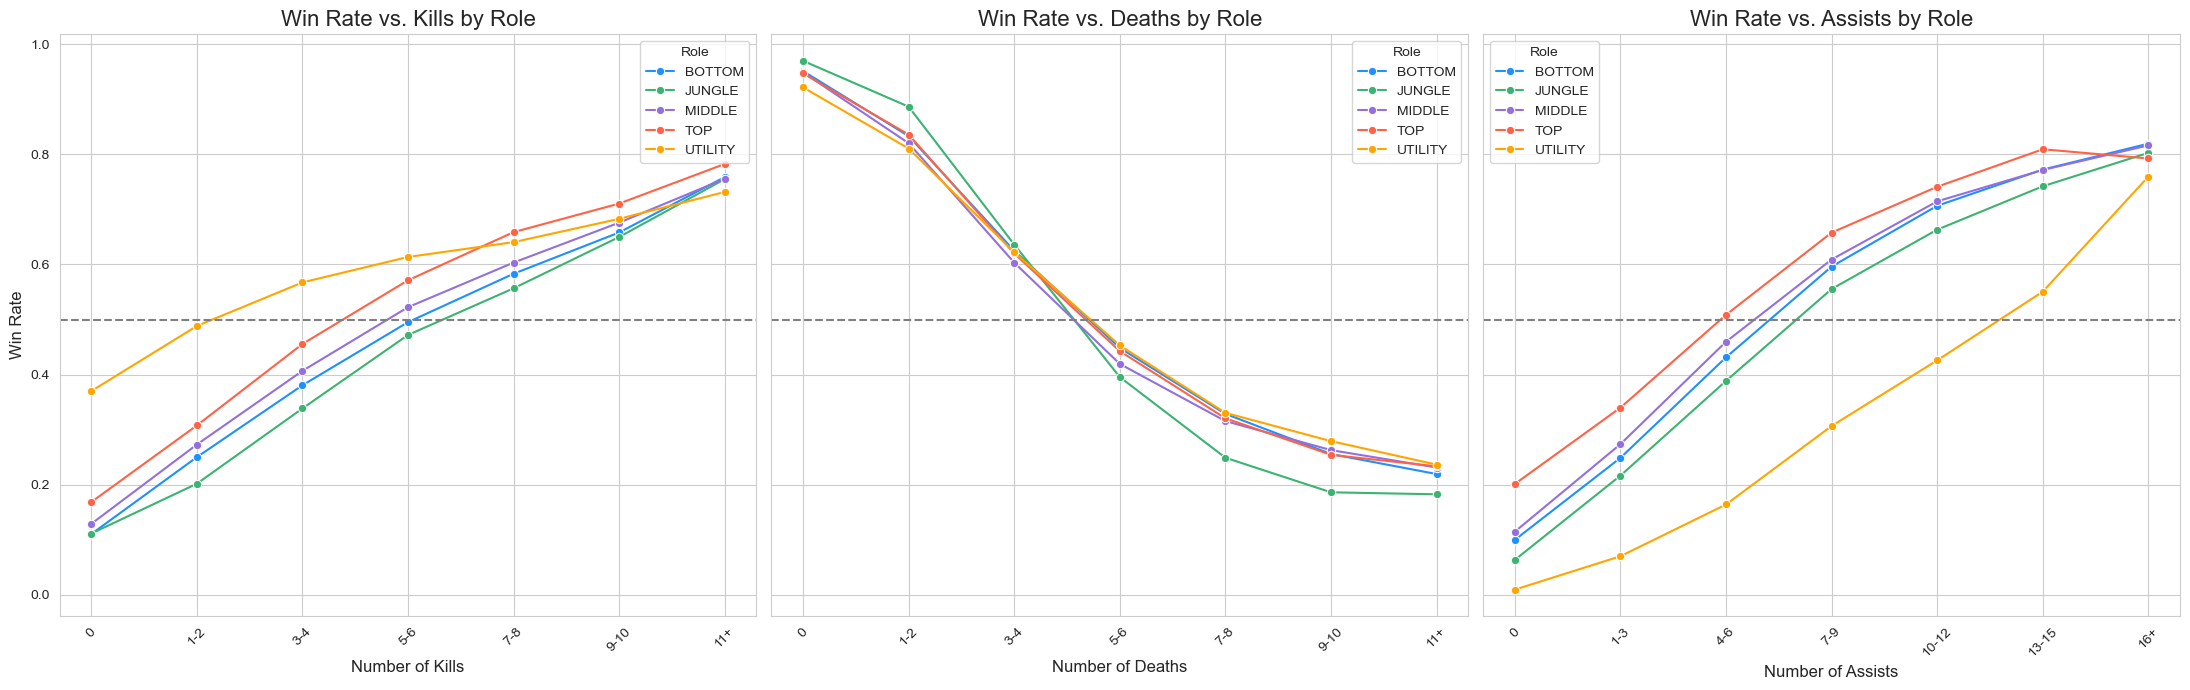

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
# We'll use the same bins as the previous analysis for consistency.
# It's good practice to redefine them here to make the cell self-contained.

# Kills Bins
bins_k = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_k = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['kill_bins'] = pd.cut(cleaned_df['kills'], bins=bins_k, labels=labels_k, right=True)

# Deaths Bins
bins_d = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_d = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['death_bins'] = pd.cut(cleaned_df['deaths'], bins=bins_d, labels=labels_d, right=True)

# Assists Bins
bins_a = [-1, 0, 3, 6, 9, 12, 15, np.inf]
labels_a = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16+']
cleaned_df['assist_bins'] = pd.cut(cleaned_df['assists'], bins=bins_a, labels=labels_a, right=True)

# Group data by role and the binned stats
win_rate_kills_role = cleaned_df.groupby(['teamPosition', 'kill_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()
win_rate_deaths_role = cleaned_df.groupby(['teamPosition', 'death_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()
win_rate_assists_role = cleaned_df.groupby(['teamPosition', 'assist_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()


# --- Visualizations ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
sns.set_style("whitegrid")
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

# --- Plot 1: Win Rate vs. Kills by Role ---
axes[0].set_title('Win Rate vs. Kills by Role', fontsize=16)
for position in positions:
    # Filter for the current role and for statistical significance
    data = win_rate_kills_role[(win_rate_kills_role['teamPosition'] == position) & (win_rate_kills_role['count'] >= 50)]
    sns.lineplot(x='kill_bins', y='mean', data=data, ax=axes[0], label=position, color=colors[position], marker='o')
axes[0].set_xlabel('Number of Kills', fontsize=12)
axes[0].set_ylabel('Win Rate', fontsize=12)
axes[0].axhline(y=0.5, color='grey', linestyle='--')
axes[0].legend(title='Role')
axes[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Win Rate vs. Deaths by Role ---
axes[1].set_title('Win Rate vs. Deaths by Role', fontsize=16)
for position in positions:
    data = win_rate_deaths_role[(win_rate_deaths_role['teamPosition'] == position) & (win_rate_deaths_role['count'] >= 50)]
    sns.lineplot(x='death_bins', y='mean', data=data, ax=axes[1], label=position, color=colors[position], marker='o')
axes[1].set_xlabel('Number of Deaths', fontsize=12)
axes[1].set_ylabel('') # Hide redundant y-axis label
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].legend(title='Role')
axes[1].tick_params(axis='x', rotation=45)

# --- Plot 3: Win Rate vs. Assists by Role ---
axes[2].set_title('Win Rate vs. Assists by Role', fontsize=16)
for position in positions:
    data = win_rate_assists_role[(win_rate_assists_role['teamPosition'] == position) & (win_rate_assists_role['count'] >= 50)]
    sns.lineplot(x='assist_bins', y='mean', data=data, ax=axes[2], label=position, color=colors[position], marker='o')
axes[2].set_xlabel('Number of Assists', fontsize=12)
axes[2].set_ylabel('') # Hide redundant y-axis label
axes[2].axhline(y=0.5, color='grey', linestyle='--')
axes[2].legend(title='Role')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Creep Score

=== Creep Score (CS) Analysis for Laning Roles ===

--- Average CS Metrics in Wins vs. Losses (for Laners) ---
      csPerMinute  laneMinionsFirst10Minutes  maxCsAdvantageOnLaneOpponent
Loss         6.93                      66.68                         21.00
Win          7.26                      69.09                         29.67


--- Average CS Metrics by Position ---
              csPerMinute  laneMinionsFirst10Minutes  \
teamPosition                                           
BOTTOM               7.23                      62.36   
MIDDLE               7.07                      72.32   
TOP                  7.00                      68.98   

              maxCsAdvantageOnLaneOpponent  
teamPosition                                
BOTTOM                               24.85  
MIDDLE                               24.60  
TOP                                  26.56  


--- Win Rate by Max CS Advantage on Lane Opponent ---
             Win_Rate  Games
cs_adv_bins                 
0  

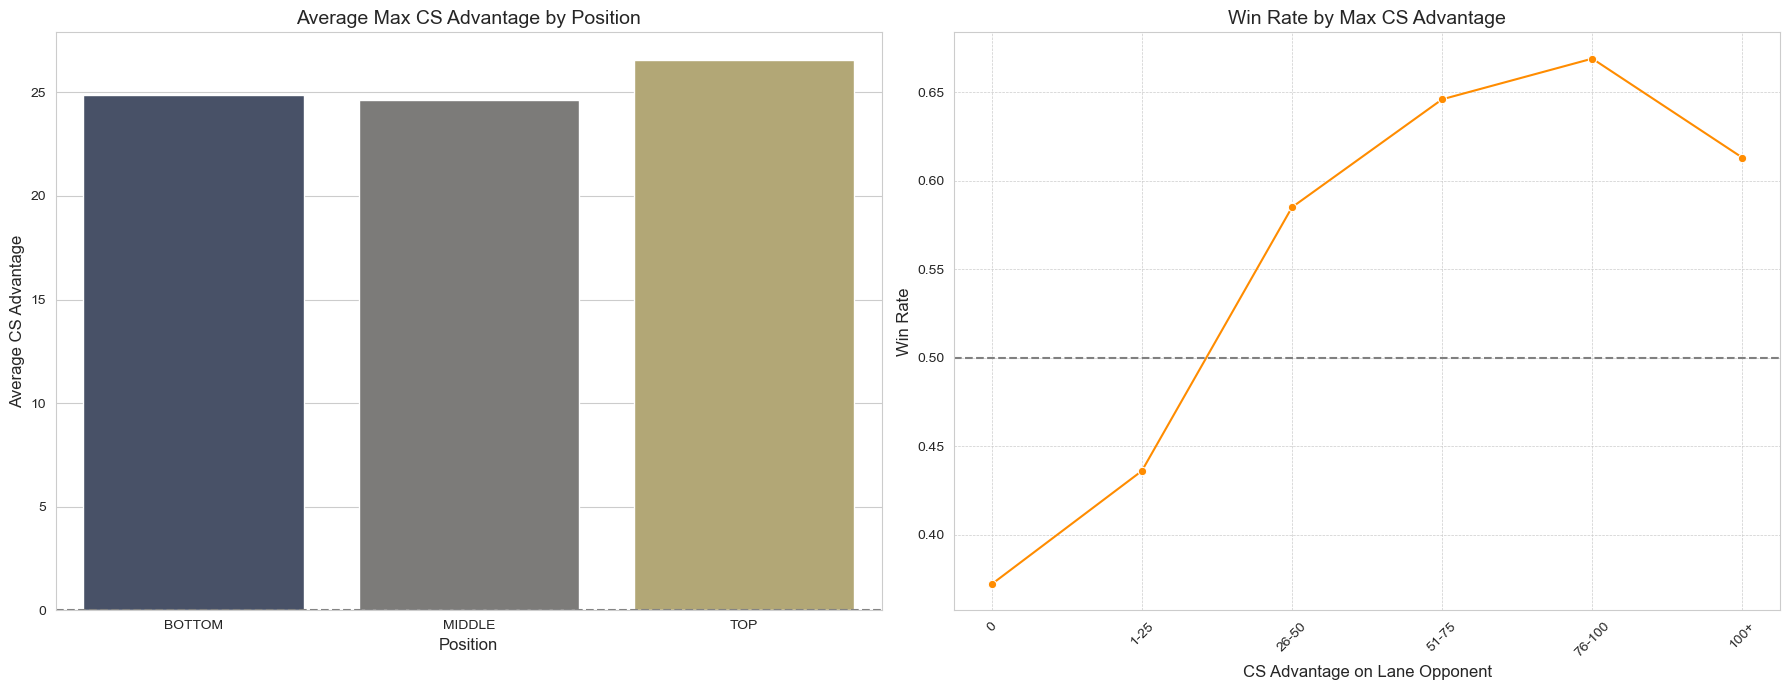

In [53]:
# Filter the DataFrame to only include the three laning roles.
laner_roles = ['TOP', 'MIDDLE', 'BOTTOM']
laner_df = cleaned_df[cleaned_df['teamPosition'].isin(laner_roles)].copy()

# Calculate CS Per Minute, a standardized metric for farm rate.
# Ensure gameDuration is not zero to avoid division errors.
laner_df['csPerMinute'] = laner_df.apply(
    lambda row: row['totalMinionsKilled'] / (row['gameDuration'] / 60) if row['gameDuration'] > 0 else 0,
    axis=1
)

print("=== Creep Score (CS) Analysis for Laning Roles ===\n")

# --- 2. Overall CS Metrics for Wins vs. Losses ---
print("--- Average CS Metrics in Wins vs. Losses (for Laners) ---")

# Define the key CS metrics we want to analyze
cs_metrics = ['csPerMinute', 'laneMinionsFirst10Minutes', 'maxCsAdvantageOnLaneOpponent']
cs_win_loss = laner_df.groupby('win')[cs_metrics].mean().round(2)
cs_win_loss.index = ['Loss', 'Win']

print(cs_win_loss)
print("\n" + "="*50 + "\n")

# --- 3. CS Metrics by Position ---
print("--- Average CS Metrics by Position ---")

cs_by_position = laner_df.groupby('teamPosition')[cs_metrics].mean().round(2)
print(cs_by_position)
print("\n" + "="*50 + "\n")

# --- 4. Win Rate by CS Advantage ---
print("--- Win Rate by Max CS Advantage on Lane Opponent ---")

# Create bins for CS advantage to see how win rate scales with a farming lead.
bins_cs = [-np.inf, -50, -25, -1, 0, 25, 50, 75, 100, np.inf]
labels_cs = ['-50+', '-49 to -25', '-24 to -1', '0', '1-25', '26-50', '51-75', '76-100', '100+']
laner_df['cs_adv_bins'] = pd.cut(laner_df['maxCsAdvantageOnLaneOpponent'], bins=bins_cs, labels=labels_cs, right=True)

win_rate_by_cs_adv = laner_df.groupby('cs_adv_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_cs_adv.columns = ['Win_Rate', 'Games']
win_rate_by_cs_adv = win_rate_by_cs_adv[win_rate_by_cs_adv['Games'] >= 50]

print(win_rate_by_cs_adv)
print("\n" + "="*50 + "\n")


# --- 5. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Plot 1: Average CS Advantage by Position
sns.barplot(x=cs_by_position.index, y=cs_by_position['maxCsAdvantageOnLaneOpponent'], ax=axes[0], hue=cs_by_position.index, palette='cividis', legend=False)
axes[0].set_title('Average Max CS Advantage by Position', fontsize=14)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Average CS Advantage', fontsize=12)
axes[0].axhline(y=0, color='grey', linestyle='--')

# Plot 2: Win Rate by CS Advantage
sns.lineplot(x=win_rate_by_cs_adv.index, y=win_rate_by_cs_adv['Win_Rate'], ax=axes[1], marker='o', color='darkorange')
axes[1].set_title('Win Rate by Max CS Advantage', fontsize=14)
axes[1].set_xlabel('CS Advantage on Lane Opponent', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


=== Creep Score (CS) Analysis for Junglers ===

--- Average Jungle CS Metrics in Wins vs. Losses ---
      jungleCsPerMinute  totalEnemyJungleMinionsKilled  \
Loss               5.33                           9.11   
Win                6.26                          17.09   

      jungleCsBefore10Minutes  maxCsAdvantageOnLaneOpponent  
Loss                    60.68                         18.36  
Win                     63.45                         37.36  


--- Win Rate by Max CS Advantage Over Enemy Jungler ---
                 Win_Rate  Games
cs_adv_bins_jng                 
0                   0.289    947
1-20                0.355  15602
21-40               0.567   6590
41-60               0.693   3796
60+                 0.804   4203




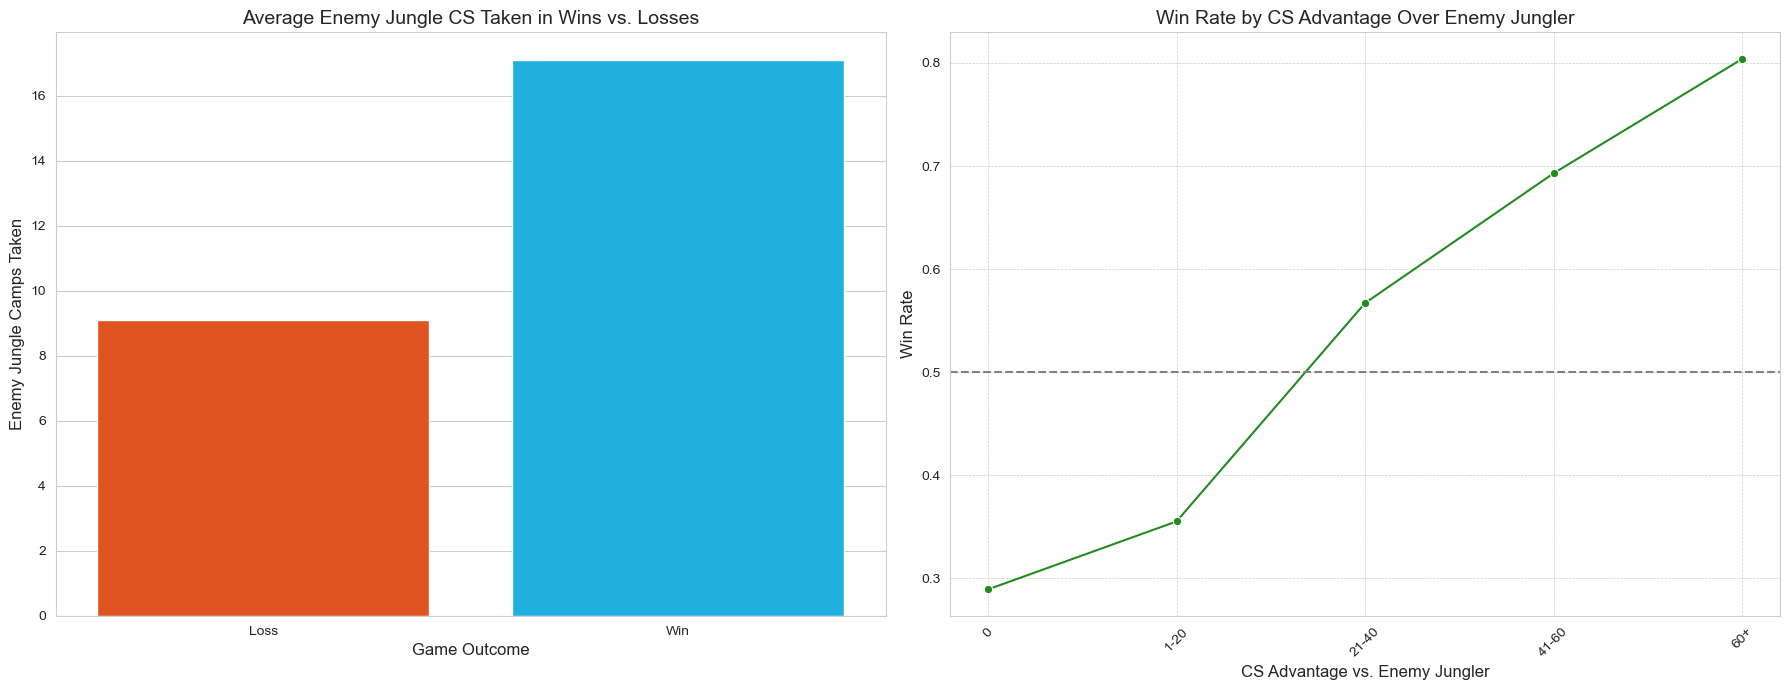

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Preparation ---
# Filter the DataFrame to only include the JUNGLE position.
jungle_df = cleaned_df[cleaned_df['teamPosition'] == 'JUNGLE'].copy()

# Calculate Jungle CS Per Minute from neutral minions killed.
jungle_df['jungleCsPerMinute'] = jungle_df.apply(
    lambda row: row['neutralMinionsKilled'] / (row['gameDuration'] / 60) if row['gameDuration'] > 0 else 0,
    axis=1
)

print("=== Creep Score (CS) Analysis for Junglers ===\n")


# --- 2. Overall Jungle CS Metrics for Wins vs. Losses ---
print("--- Average Jungle CS Metrics in Wins vs. Losses ---")

# Define the key CS metrics relevant to junglers.
# Note: For junglers, 'maxCsAdvantageOnLaneOpponent' compares them to the enemy jungler.
cs_metrics_jungle = ['jungleCsPerMinute', 'totalEnemyJungleMinionsKilled', 'jungleCsBefore10Minutes', 'maxCsAdvantageOnLaneOpponent']
cs_win_loss_jungle = jungle_df.groupby('win')[cs_metrics_jungle].mean().round(2)
cs_win_loss_jungle.index = ['Loss', 'Win']

print(cs_win_loss_jungle)
print("\n" + "="*70 + "\n")


# --- 3. Win Rate by CS Advantage Over Enemy Jungler ---
print("--- Win Rate by Max CS Advantage Over Enemy Jungler ---")

# Create bins for CS advantage to see how win rate scales with a farming lead over the enemy jungler.
bins_cs_jng = [-np.inf, -40, -20, -1, 0, 20, 40, 60, np.inf]
labels_cs_jng = ['-40+', '-39 to -20', '-19 to -1', '0', '1-20', '21-40', '41-60', '60+']
jungle_df['cs_adv_bins_jng'] = pd.cut(jungle_df['maxCsAdvantageOnLaneOpponent'], bins=bins_cs_jng, labels=labels_cs_jng, right=True)

win_rate_by_cs_adv_jng = jungle_df.groupby('cs_adv_bins_jng', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_cs_adv_jng.columns = ['Win_Rate', 'Games']
win_rate_by_cs_adv_jng = win_rate_by_cs_adv_jng[win_rate_by_cs_adv_jng['Games'] >= 50]

print(win_rate_by_cs_adv_jng)
print("\n" + "="*70 + "\n")


# --- 4. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Plot 1: Comparing Enemy Jungle CS in Wins vs. Losses
sns.barplot(
    x=cs_win_loss_jungle.index,
    y=cs_win_loss_jungle['totalEnemyJungleMinionsKilled'],
    ax=axes[0],
    hue=cs_win_loss_jungle.index,
    palette=['orangered', 'deepskyblue'],
    legend=False
)
axes[0].set_title('Average Enemy Jungle CS Taken in Wins vs. Losses', fontsize=14)
axes[0].set_xlabel('Game Outcome', fontsize=12)
axes[0].set_ylabel('Enemy Jungle Camps Taken', fontsize=12)

# Plot 2: Win Rate by CS Advantage
sns.lineplot(x=win_rate_by_cs_adv_jng.index, y=win_rate_by_cs_adv_jng['Win_Rate'], ax=axes[1], marker='o', color='forestgreen')
axes[1].set_title('Win Rate by CS Advantage Over Enemy Jungler', fontsize=14)
axes[1].set_xlabel('CS Advantage vs. Enemy Jungler', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


**Key Takeaways**
- Higher CS/M shows a higher win rate. The winning player with an early advantage can usually pressure the lane harder, denying farm from the opponent. 
- CS = Gold, and gold is one of the most important resources in the game.
- Jungers who take more enemy camps also has a high correlation to winning, however, typically the winning team will have more control over the map, which can indicate a bias towards winning team rather than winning jungler.

## Objectives

### Towers

=== Tower, First Tower Time, and Turret Plate Analysis ===

--- Win Rate by Securing First Tower ---
 Did Not Get First Tower Kill    0.478
Got First Tower Kill            0.710
Name: win, dtype: float64 

--- Win Rate by First Tower Kill Time ---
                        Win_Rate  Games
first_tower_time_bins                 
< 8 min                   0.667     24
8-10 min                  0.754    313
10-12 min                 0.752   2077
12-14 min                 0.743   4956
14-16 min                 0.678   6753
16+ min                   0.657    896 

--- Win Rate by Turret Plates Taken ---
             Win_Rate  Games
plate_bins                 
0              0.417  66393
1              0.485  33301
2              0.537  23937
3              0.602  14275
4              0.672   8278
5              0.715   6964
6+             0.806   2542 

--- Average Turret Plates Taken by Role ---
 teamPosition
TOP        1.91
BOTTOM     1.88
MIDDLE     1.35
UTILITY    1.22
JUNGLE     0.37
Name

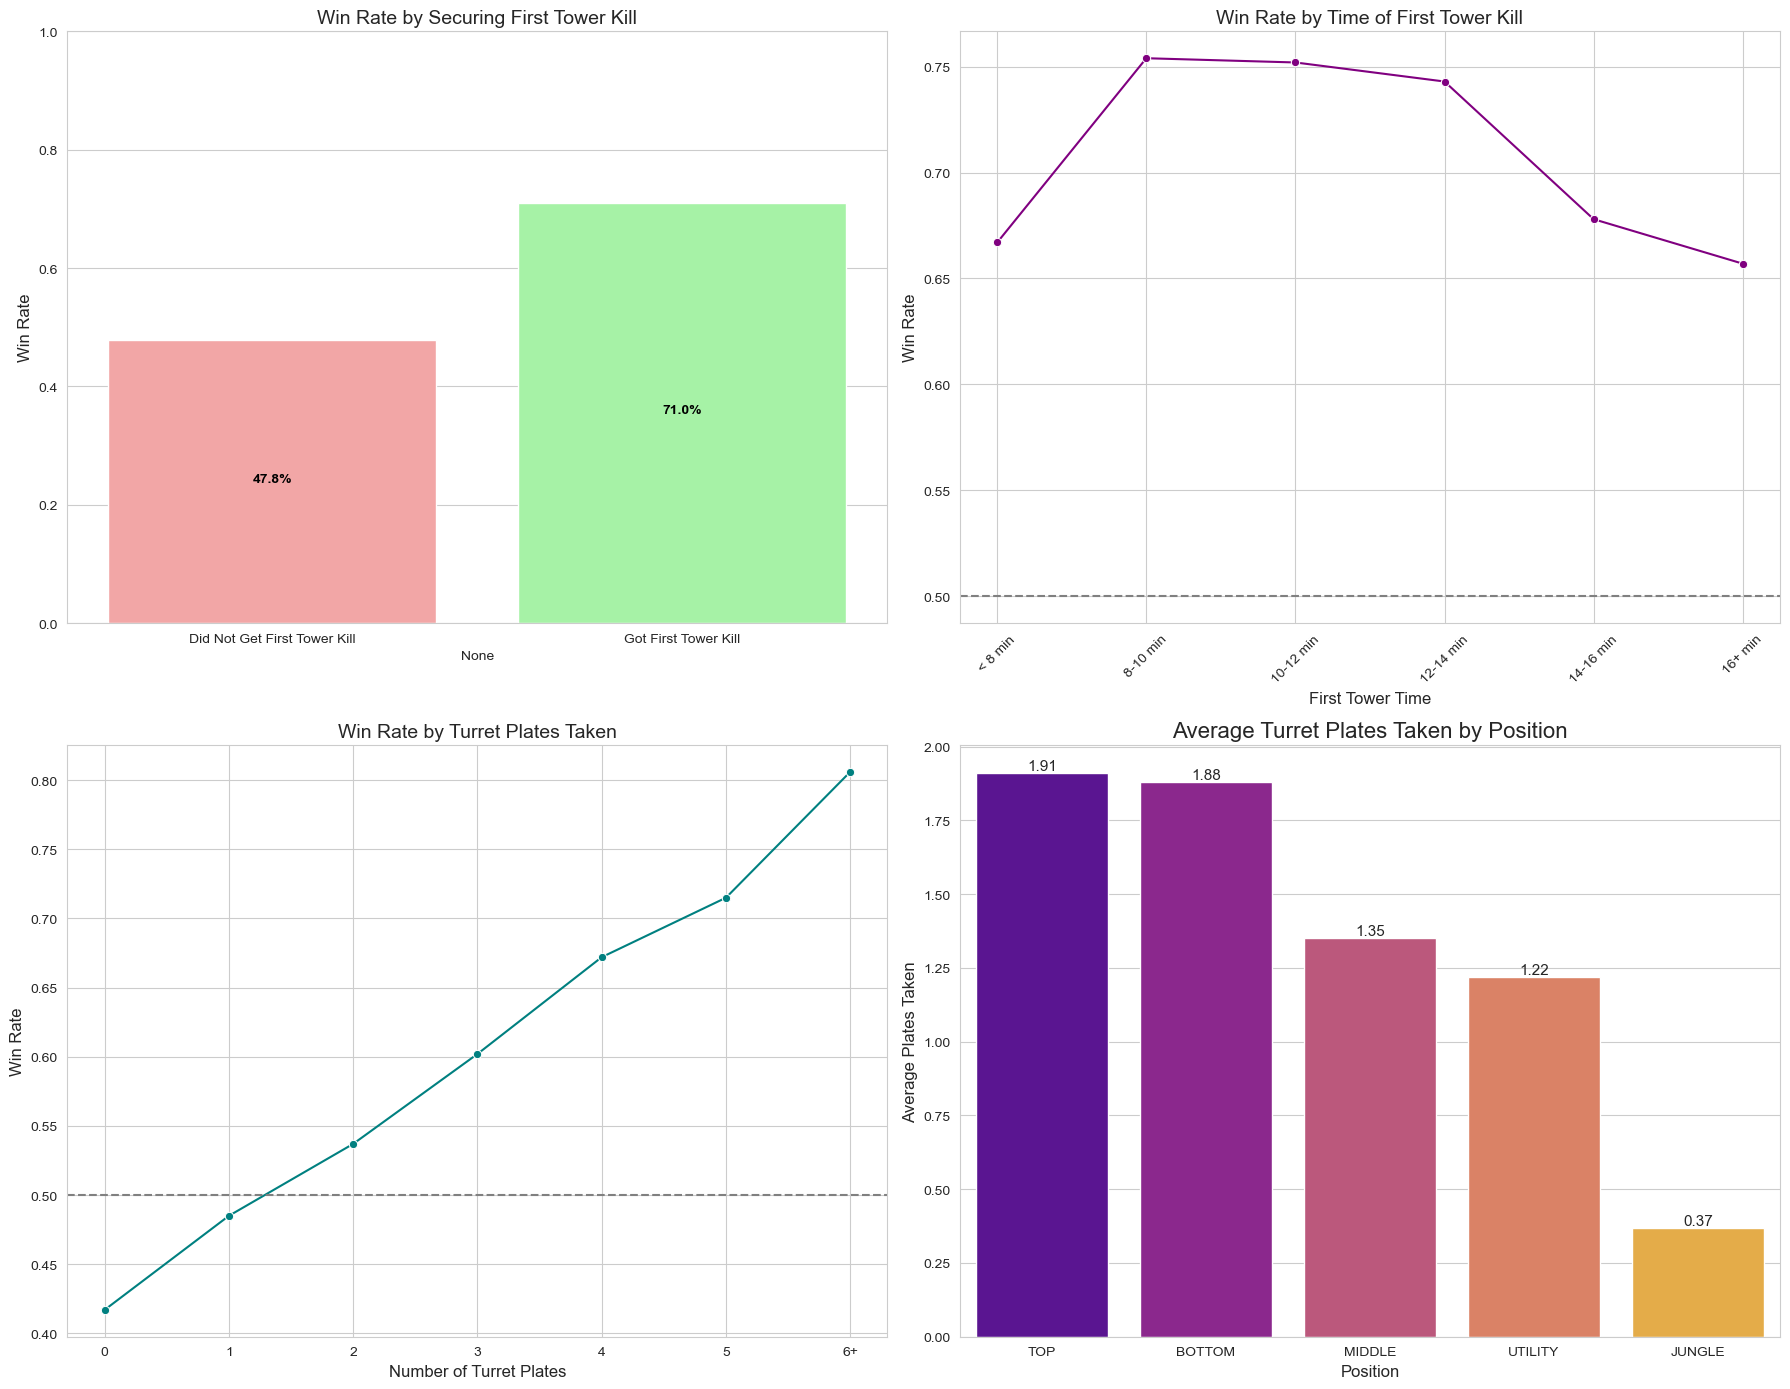

In [92]:
# --- 1. Data Preparation ---
tower_df = cleaned_df.copy()
tower_df.dropna(subset=['firstTowerKill'], inplace=True)
tower_df['firstTowerKill'] = tower_df['firstTowerKill'].astype(bool)
tower_df['firstTurretKilledTime'] = tower_df['firstTurretKilledTime'].fillna(0)

print("=== Tower, First Tower Time, and Turret Plate Analysis ===\n")


# --- 2. Calculations for Plotting ---

# Win Rate by First Tower Kill
win_rate_ft = tower_df.groupby('firstTowerKill')['win'].mean().round(3)
win_rate_ft.index = ['Did Not Get First Tower Kill', 'Got First Tower Kill']
print("--- Win Rate by Securing First Tower ---\n", win_rate_ft, "\n" + "="*50 + "\n")

# Win Rate by First Tower Time
first_tower_takers = tower_df[tower_df['firstTowerKill'] == True].copy()
bins_time = [0, 480, 600, 720, 840, 960, np.inf]
labels_time = ['< 8 min', '8-10 min', '10-12 min', '12-14 min', '14-16 min', '16+ min']
first_tower_takers['first_tower_time_bins'] = pd.cut(first_tower_takers['firstTurretKilledTime'], bins=bins_time, labels=labels_time, right=False)
win_rate_by_time = first_tower_takers.groupby('first_tower_time_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_time.columns = ['Win_Rate', 'Games']
print("--- Win Rate by First Tower Kill Time ---\n", win_rate_by_time, "\n" + "="*50 + "\n")

# Win Rate by Turret Plates Taken
bins_plates = [-1, 0, 1, 2, 3, 4, 5, np.inf]
labels_plates = ['0', '1', '2', '3', '4', '5', '6+']
tower_df['plate_bins'] = pd.cut(tower_df['turretPlatesTaken'], bins=bins_plates, labels=labels_plates, right=True)
win_rate_by_plates = tower_df.groupby('plate_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_plates.columns = ['Win_Rate', 'Games']
print("--- Win Rate by Turret Plates Taken ---\n", win_rate_by_plates[win_rate_by_plates['Games'] >= 50], "\n" + "="*50 + "\n")

# Average Turret Plates by Position
plates_by_position = cleaned_df.groupby('teamPosition')['turretPlatesTaken'].mean().round(2).sort_values(ascending=False)
print("--- Average Turret Plates Taken by Role ---\n", plates_by_position, "\n" + "="*50 + "\n")


# --- 3. Visualizations (2x2 Grid) ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Changed to 2x2 layout
sns.set_style("whitegrid")

# Plot 1: Win Rate by First Tower (Top-Left)
ax1 = axes[0, 0]
sns.barplot(x=win_rate_ft.index, y=win_rate_ft.values, ax=ax1, hue=win_rate_ft.index, palette=['#ff9999','#99ff99'], legend=False)
ax1.set_title('Win Rate by Securing First Tower Kill', fontsize=14)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.set_ylim(0, 1)
for i, v in enumerate(win_rate_ft.values):
    ax1.text(i, v/2, f'{v:.1%}', color='black', ha='center', weight='bold')

# Plot 2: Win Rate by First Tower Time (Top-Right)
ax2 = axes[0, 1]
sns.lineplot(x=win_rate_by_time.index, y=win_rate_by_time['Win_Rate'], ax=ax2, marker='o', color='purple')
ax2.set_title('Win Rate by Time of First Tower Kill', fontsize=14)
ax2.set_xlabel('First Tower Time', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Win Rate by Turret Plates Taken (Bottom-Left)
ax3 = axes[1, 0]
sns.lineplot(x=win_rate_by_plates.index, y=win_rate_by_plates['Win_Rate'], ax=ax3, marker='o', color='teal')
ax3.set_title('Win Rate by Turret Plates Taken', fontsize=14)
ax3.set_xlabel('Number of Turret Plates', fontsize=12)
ax3.set_ylabel('Win Rate', fontsize=12)
ax3.axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: Average Turret Plates by Position (Bottom-Right)
ax4 = axes[1, 1]
sns.barplot(x=plates_by_position.index, y=plates_by_position.values, ax=ax4, hue=plates_by_position.index, palette='plasma', legend=False)
ax4.set_title('Average Turret Plates Taken by Position', fontsize=16)
ax4.set_xlabel('Position', fontsize=12)
ax4.set_ylabel('Average Plates Taken', fontsize=12)
for index, value in enumerate(plates_by_position.values):
    ax4.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=11)


plt.tight_layout()
plt.show()


**Key Takeaway**
- Teams that get first turret wins 71% of the time. The highest win rate by time of kill is 8-10 minutes, with a steep fall off at 12-14 minutes, which can be explained by turret plates dropping at the 14 minute mark. 
- Turret plates = gold, so it makes sense that it has a strong correlation to winning

### Neutral Objectives (Baron/Dragons)

=== Major Objective Correlation with Win Rate ===

--- Win Rate by Securing First Dragon & First Baron ---

First Dragon:
Did Not Get First Dragon    0.394
Got First Dragon            0.606
Name: win, dtype: float64

First Baron:
Did Not Get First Baron    0.381
Got First Baron            0.825
Name: win, dtype: float64


--- Win Rate by Number of Objectives Taken ---

Dragon Kills:
                  Win_Rate   Games
dragon_kill_bins                  
0                    0.465  123471
1                    0.546   16824
2                    0.661    8783
3                    0.788    4745
4+ (Soul)            0.909    1867

Baron Kills:
                 Win_Rate   Games
baron_kill_bins                  
0                   0.370  110395
1                   0.820   40230
2                   0.791    4675
3+                  0.731     390


--- Win Rate by Rift Herald and Atakhan Kills ---

Rift Herald Kills:
                 Win_Rate  Games
riftHeraldKills                 
0            

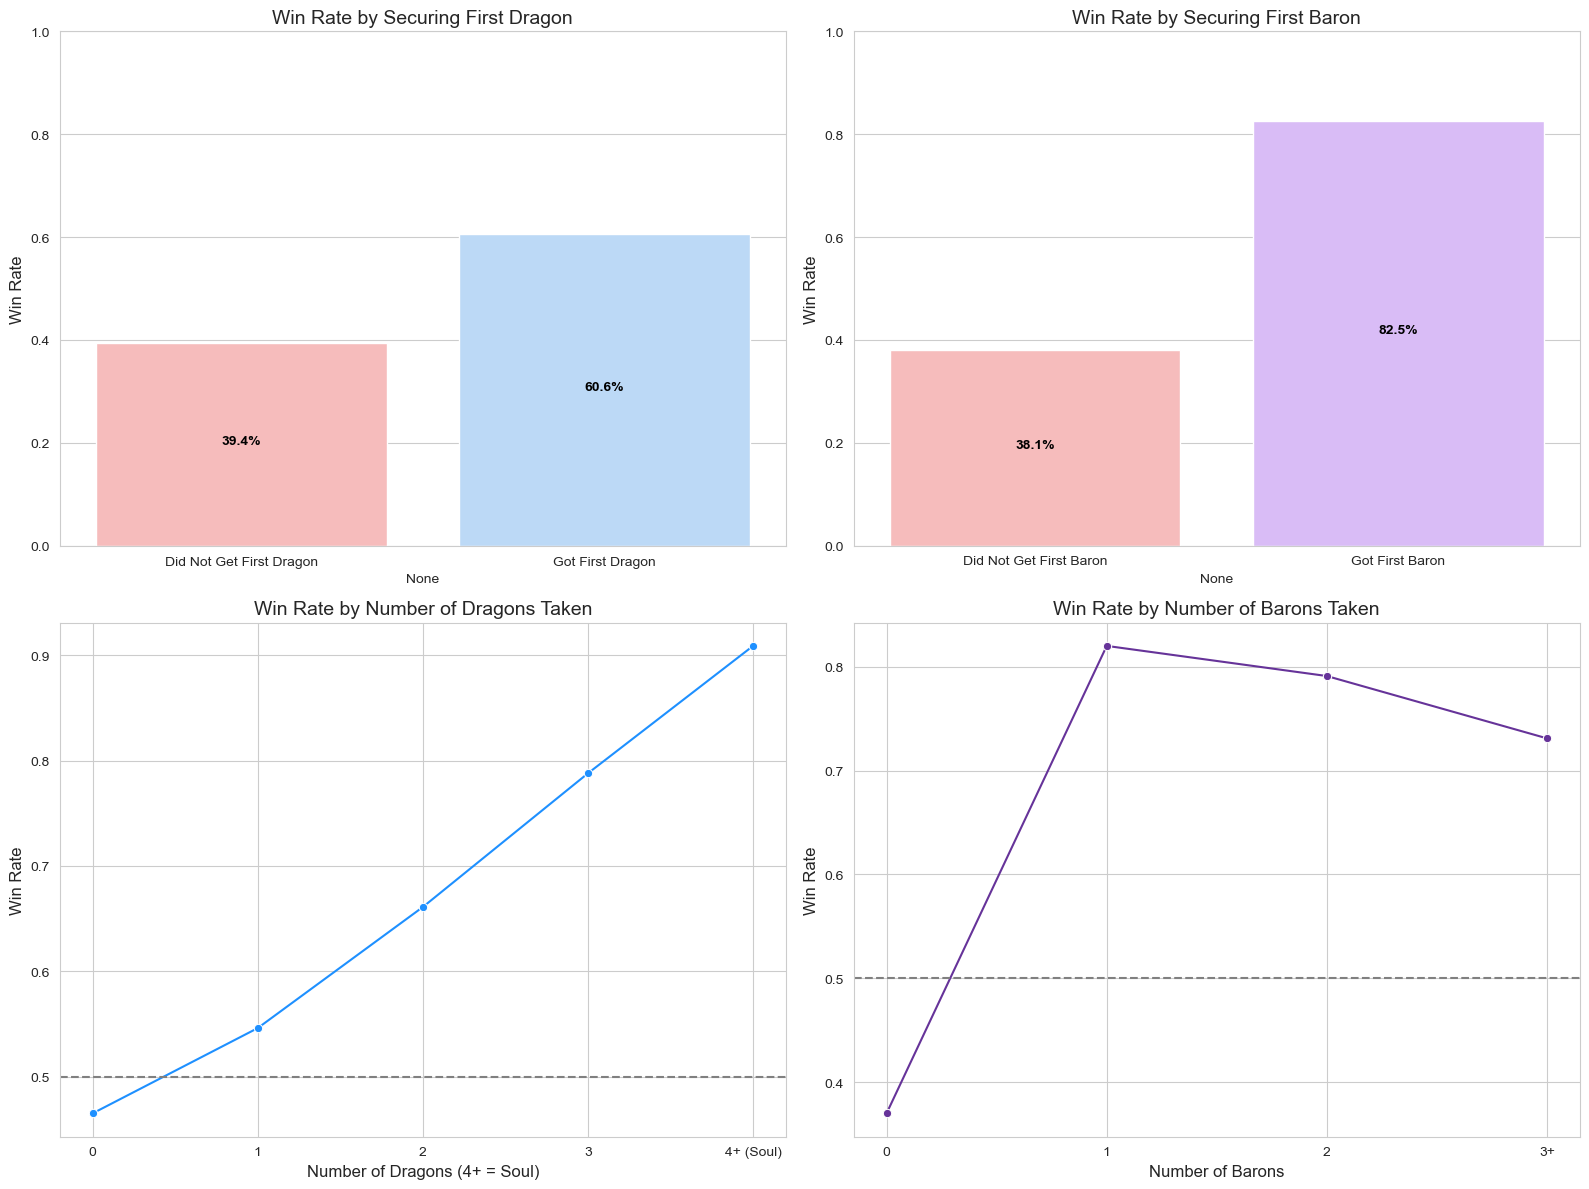

In [83]:
# --- 1. Data Preparation ---
objectives_df = cleaned_df.copy()
objectives_df.dropna(subset=['baronFirst', 'dragonFirst'], inplace=True)
objectives_df['baronFirst'] = objectives_df['baronFirst'].astype(bool)
objectives_df['dragonFirst'] = objectives_df['dragonFirst'].astype(bool)

print("=== Major Objective Correlation with Win Rate ===\n")


# --- 2. First Objective Impact ---
print("--- Win Rate by Securing First Dragon & First Baron ---")
win_rate_dragon_first = objectives_df.groupby('dragonFirst')['win'].mean().round(3)
win_rate_dragon_first.index = ['Did Not Get First Dragon', 'Got First Dragon']
print("\nFirst Dragon:")
print(win_rate_dragon_first)
win_rate_baron_first = objectives_df.groupby('baronFirst')['win'].mean().round(3)
win_rate_baron_first.index = ['Did Not Get First Baron', 'Got First Baron']
print("\nFirst Baron:")
print(win_rate_baron_first)
print("\n" + "="*50 + "\n")


# --- 3. Stacked Objective Impact ---
print("--- Win Rate by Number of Objectives Taken ---")

# --- FIX: Capped dragon bins at 4+ to represent securing Soul ---
bins_d = [-1, 0, 1, 2, 3, np.inf]
labels_d = ['0', '1', '2', '3', '4+ (Soul)']
objectives_df['dragon_kill_bins'] = pd.cut(objectives_df['dragonKills'], bins=bins_d, labels=labels_d, right=True)
win_rate_dragons = objectives_df.groupby('dragon_kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_dragons.columns = ['Win_Rate', 'Games']
print("\nDragon Kills:")
print(win_rate_dragons[win_rate_dragons['Games'] >= 50])

bins_b = [-1, 0, 1, 2, np.inf]
labels_b = ['0', '1', '2', '3+']
objectives_df['baron_kill_bins'] = pd.cut(objectives_df['baronKills'], bins=bins_b, labels=labels_b, right=True)
win_rate_barons = objectives_df.groupby('baron_kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_barons.columns = ['Win_Rate', 'Games']
print("\nBaron Kills:")
print(win_rate_barons[win_rate_barons['Games'] >= 50])
print("\n" + "="*50 + "\n")


# --- 4. Rift Herald & Atakhan Analysis ---
print("--- Win Rate by Rift Herald and Atakhan Kills ---")
win_rate_herald = objectives_df.groupby('riftHeraldKills')['win'].agg(['mean', 'count']).round(3)
win_rate_herald.columns = ['Win_Rate', 'Games']
print("\nRift Herald Kills:")
print(win_rate_herald)

atakhan_counts = objectives_df['atakhanKills'].value_counts()
if len(atakhan_counts) > 1 and atakhan_counts.iloc[1] > 0:
    win_rate_atakhan = objectives_df.groupby('atakhanKills')['win'].agg(['mean', 'count']).round(3)
    win_rate_atakhan.columns = ['Win_Rate', 'Games']
    print("\nAtakhan Kills:")
    print(win_rate_atakhan)
else:
    print("\nAtakhan Kills: No 'Atakhan' kills recorded in this dataset.")
print("\n" + "="*50 + "\n")

print("--- Win Rate by Game Duration for First Baron Takers ---")
print("(Note: Using game duration as a proxy for when Baron was taken)\n")

# Filter for teams that got the first Baron
first_baron_takers = objectives_df[objectives_df['baronFirst'] == True].copy()

# Create bins for game duration (in seconds). Baron spawns at 20 min (1200s).
bins_g = [1200, 1500, 1800, 2100, np.inf] # 20-25m, 25-30m, 30-35m, 35m+
labels_g = ['20-25 min', '25-30 min', '30-35 min', '35+ min']
first_baron_takers['game_duration_bins'] = pd.cut(first_baron_takers['gameDuration'], bins=bins_g, labels=labels_g, right=False)

win_rate_by_baron_time = first_baron_takers.groupby('game_duration_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_baron_time.columns = ['Win_Rate', 'Games']
print(win_rate_by_baron_time)
print("\n" + "="*50 + "\n")

# --- 5. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Win Rate by First Dragon
ax1 = axes[0, 0]
sns.barplot(x=win_rate_dragon_first.index, y=win_rate_dragon_first.values, ax=ax1, hue=win_rate_dragon_first.index, palette=['#ffb3b3', '#b3d9ff'], legend=False)
ax1.set_title('Win Rate by Securing First Dragon', fontsize=14)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.set_ylim(0, 1)
for i, v in enumerate(win_rate_dragon_first.values):
    ax1.text(i, v/2, f'{v:.1%}', color='black', ha='center', weight='bold')

# Plot 2: Win Rate by First Baron
ax2 = axes[0, 1]
sns.barplot(x=win_rate_baron_first.index, y=win_rate_baron_first.values, ax=ax2, hue=win_rate_baron_first.index, palette=['#ffb3b3', '#d9b3ff'], legend=False)
ax2.set_title('Win Rate by Securing First Baron', fontsize=14)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.set_ylim(0, 1)
for i, v in enumerate(win_rate_baron_first.values):
    ax2.text(i, v/2, f'{v:.1%}', color='black', ha='center', weight='bold')

# Plot 3: Win Rate by Dragon Kills
ax3 = axes[1, 0]
sns.lineplot(data=win_rate_dragons, x=win_rate_dragons.index, y='Win_Rate', ax=ax3, marker='o', color='dodgerblue')
ax3.set_title('Win Rate by Number of Dragons Taken', fontsize=14)
ax3.set_xlabel('Number of Dragons (4+ = Soul)', fontsize=12) # Updated Label
ax3.set_ylabel('Win Rate', fontsize=12)
ax3.axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: Win Rate by Baron Kills
ax4 = axes[1, 1]
sns.lineplot(data=win_rate_barons, x=win_rate_barons.index, y='Win_Rate', ax=ax4, marker='o', color='rebeccapurple')
ax4.set_title('Win Rate by Number of Barons Taken', fontsize=14)
ax4.set_xlabel('Number of Barons', fontsize=12)
ax4.set_ylabel('Win Rate', fontsize=12)
ax4.axhline(y=0.5, color='grey', linestyle='--')

plt.tight_layout()
plt.show()


=== Dragon Kills Participation by Role ===

--- Average Dragon Kills on Team by Player Role ---
teamPosition
JUNGLE     1.52
BOTTOM     0.14
MIDDLE     0.06
TOP        0.06
UTILITY    0.03
Name: dragonKills, dtype: float64


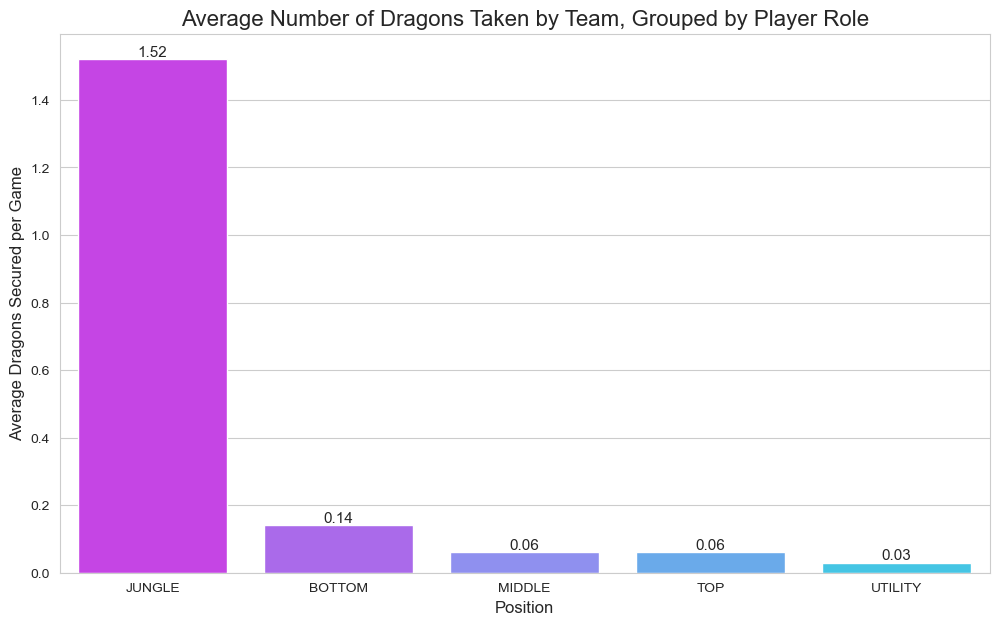


--- Interpretation Note ---
This chart shows the average number of dragons a player's TEAM takes, grouped by that player's role.
Since 'dragonKills' is a team stat, the values are very similar across roles.
A higher average for a role like Jungle or Support might indicate that when those roles perform well,
their teams are more successful at securing this objective.


In [93]:
# --- Dragon Kills by Position Analysis ---

print("=== Dragon Kills Participation by Role ===\n")

# Step 1: Group the DataFrame by role and calculate the mean for dragon kills.
# Note: 'dragonKills' is a team-level stat, so this shows which roles are on
# teams that successfully secure dragons, not who gets the last hit.
dragons_by_position = cleaned_df.groupby('teamPosition')['dragonKills'].mean().round(2).sort_values(ascending=False)

print("--- Average Dragon Kills on Team by Player Role ---")
print(dragons_by_position)

# --- Visualization ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(
    x=dragons_by_position.index,
    y=dragons_by_position.values,
    hue=dragons_by_position.index,
    palette='cool_r',
    legend=False
)

# Add plot details
ax.set_title('Average Number of Dragons Taken by Team, Grouped by Player Role', fontsize=16)
ax.set_xlabel('Position', fontsize=12)
ax.set_ylabel('Average Dragons Secured per Game', fontsize=12)

# Add text labels on top of each bar for clarity
for index, value in enumerate(dragons_by_position.values):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=11)

plt.show()

print("\n--- Interpretation Note ---")
print("This chart shows the average number of dragons a player's TEAM takes, grouped by that player's role.")
print("Since 'dragonKills' is a team stat, the values are very similar across roles.")
print("A higher average for a role like Jungle or Support might indicate that when those roles perform well,")
print("their teams are more successful at securing this objective.")


=== Win Rate by Number of Dragons Taken (Jungle Role) ===

--- Win Rate by Dragon Kills (Junglers Only) ---
                  Win_Rate  Games
dragon_kill_bins                 
0                    0.150   7264
1                    0.412   9096
2                    0.650   8200
3                    0.787   4712
4+ (Soul)            0.909   1866


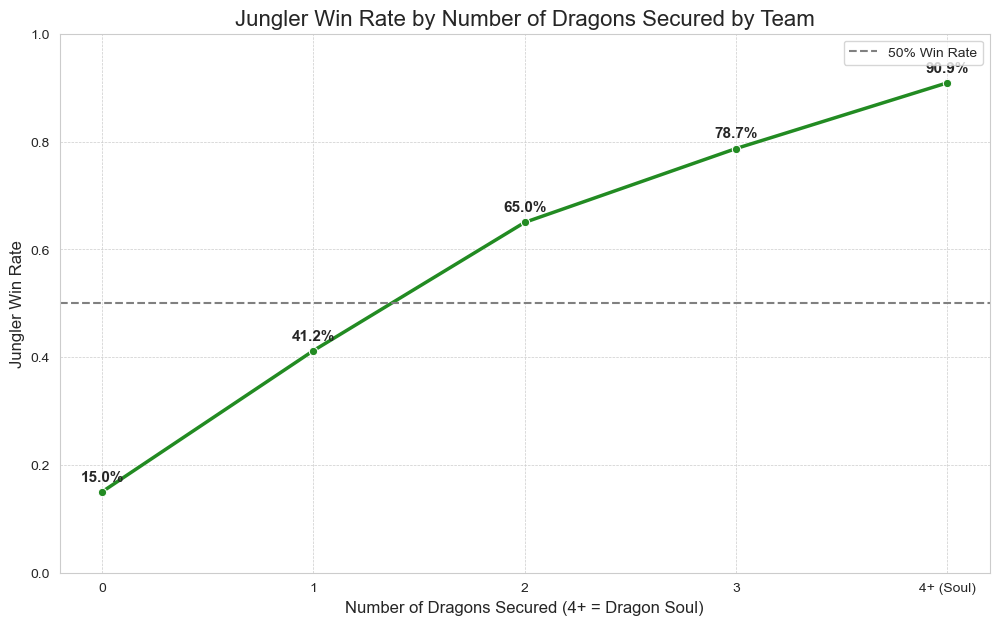

In [95]:
# Filter the DataFrame to only include players in the JUNGLE position.
jungle_df = cleaned_df[cleaned_df['teamPosition'] == 'JUNGLE'].copy()

# Create bins for the number of dragons taken.
bins_d = [-1, 0, 1, 2, 3, np.inf]
labels_d = ['0', '1', '2', '3', '4+ (Soul)']
jungle_df['dragon_kill_bins'] = pd.cut(jungle_df['dragonKills'], bins=bins_d, labels=labels_d, right=True)

# --- 2. Calculate Win Rate by Dragon Kills for Junglers ---
print("=== Win Rate by Number of Dragons Taken (Jungle Role) ===\n")

# Group by the dragon kill bins and calculate the win rate and number of games.
win_rate_by_dragons_jng = jungle_df.groupby('dragon_kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_dragons_jng.columns = ['Win_Rate', 'Games']

# Filter for bins with enough games to be statistically significant.
win_rate_by_dragons_jng = win_rate_by_dragons_jng[win_rate_by_dragons_jng['Games'] >= 50]

print("--- Win Rate by Dragon Kills (Junglers Only) ---")
print(win_rate_by_dragons_jng)

# --- 3. Visualization ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create the line plot
ax = sns.lineplot(
    x=win_rate_by_dragons_jng.index,
    y=win_rate_by_dragons_jng['Win_Rate'],
    marker='o',
    color='forestgreen', # Changed color to represent the jungle role
    linewidth=2.5
)

# Add plot details
ax.set_title('Jungler Win Rate by Number of Dragons Secured by Team', fontsize=16)
ax.set_xlabel('Number of Dragons Secured (4+ = Dragon Soul)', fontsize=12)
ax.set_ylabel('Jungler Win Rate', fontsize=12)
ax.axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
ax.set_ylim(0, 1.0)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add win rate labels to each point on the graph
for index, row in win_rate_by_dragons_jng.iterrows():
    ax.text(index, row['Win_Rate'] + 0.02, f'{row["Win_Rate"]:.1%}', ha='center', fontsize=11, weight='bold')

plt.show()


=== Calculating 'dragonLead' Column ===

Successfully added the 'dragonLead' column.
It represents the number of dragons a player's team has taken minus the enemy team's count.

--- Win Rate by Dragon Lead for Each Role ---


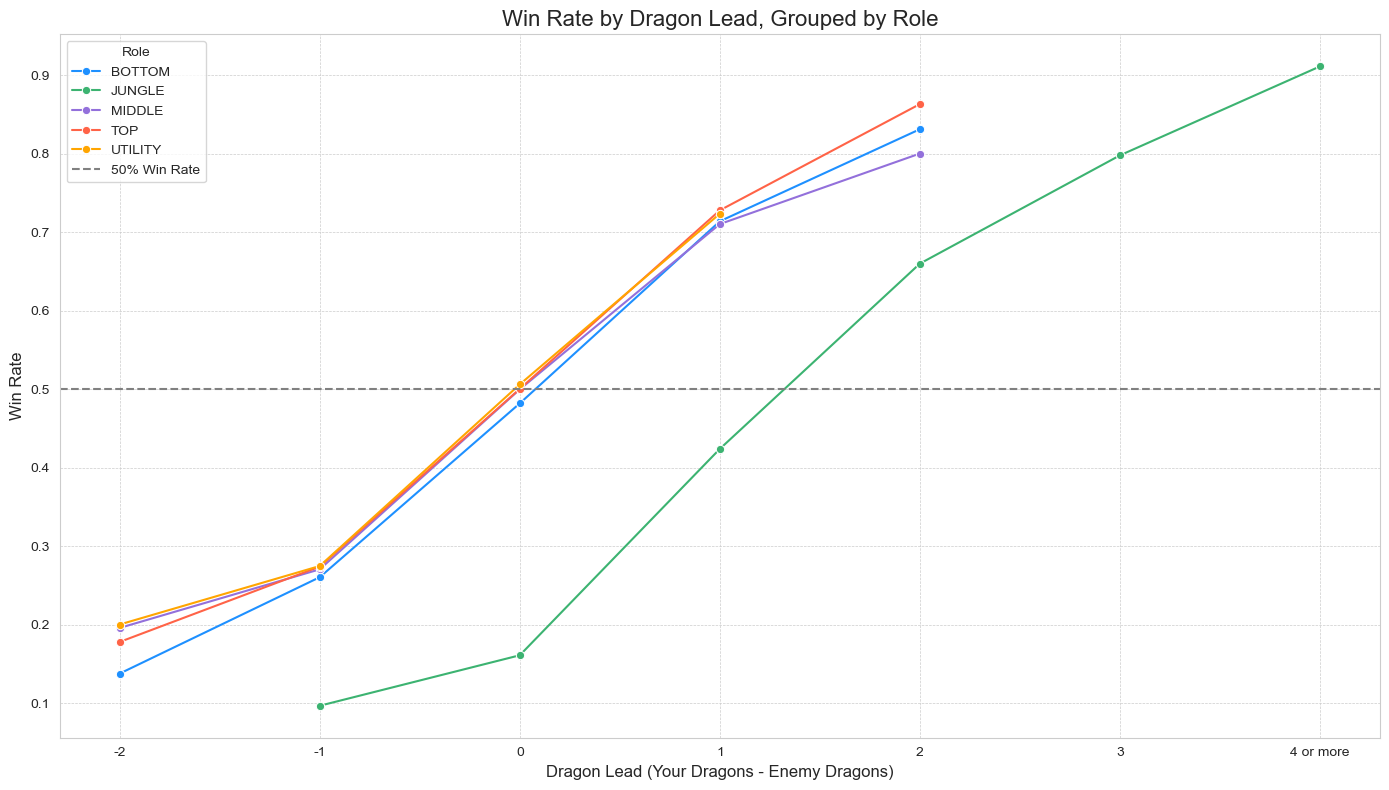

In [90]:
# --- 1. Calculate Dragon Lead ---
print("=== Calculating 'dragonLead' Column ===\n")

# Step 1: We need to know the dragon count for both teams in a match.
# First, create a unique identifier for each team in each match.
cleaned_df['matchTeamId'] = cleaned_df['matchId'] + '_' + cleaned_df['teamId'].astype(str)

# Step 2: Create a mapping of each team's dragon kills.
# The key will be the unique match-team ID, and the value will be the dragon count.
# We use 'first' because 'dragonKills' is a team stat and is the same for all 5 players.
dragon_map = cleaned_df.groupby('matchTeamId')['dragonKills'].first()

# Step 3: Identify the opposing team for each player.
# We do this by grouping by matchId and finding the two unique teamIds.
team_ids_per_match = cleaned_df.groupby('matchId')['teamId'].unique()

# Create a map to find the opponent's teamId.
opponent_map = {}
for match, teams in team_ids_per_match.items():
    if len(teams) == 2:
        opponent_map[f"{match}_{teams[0]}"] = f"{match}_{teams[1]}"
        opponent_map[f"{match}_{teams[1]}"] = f"{match}_{teams[0]}"

# Step 4: Map the opponent's unique ID to each player's row.
cleaned_df['opponentMatchTeamId'] = cleaned_df['matchTeamId'].map(opponent_map)

# Step 5: Map the opponent's dragon count to each player's row.
cleaned_df['opponentDragonKills'] = cleaned_df['opponentMatchTeamId'].map(dragon_map).fillna(0).astype(int)

# Step 6: Calculate the Dragon Lead.
cleaned_df['dragonLead'] = cleaned_df['dragonKills'] - cleaned_df['opponentDragonKills']

# Clean up temporary columns
cleaned_df = cleaned_df.drop(columns=['matchTeamId', 'opponentMatchTeamId', 'opponentDragonKills'])

print("Successfully added the 'dragonLead' column.")
print("It represents the number of dragons a player's team has taken minus the enemy team's count.\n")


# --- 2. Analyze Dragon Lead by Role ---
print("--- Win Rate by Dragon Lead for Each Role ---")

# Create bins for the dragon lead.
bins_dl = [-np.inf, -3, -2, -1, 0, 1, 2, 3, np.inf]
labels_dl = ['-3 or less', '-2', '-1', '0', '1', '2', '3', '4 or more']
cleaned_df['dragon_lead_bins'] = pd.cut(cleaned_df['dragonLead'], bins=bins_dl, labels=labels_dl, right=True)

# Group by role and lead bins to calculate win rate.
win_rate_by_lead_role = cleaned_df.groupby(['teamPosition', 'dragon_lead_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()


# --- 3. Visualization ---
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

ax = sns.lineplot(
    data=win_rate_by_lead_role[win_rate_by_lead_role['count'] >= 50], # Filter for significance
    x='dragon_lead_bins',
    y='mean',
    hue='teamPosition',
    palette=colors,
    marker='o'
)

# Add plot details
ax.set_title('Win Rate by Dragon Lead, Grouped by Role', fontsize=16)
ax.set_xlabel('Dragon Lead (Your Dragons - Enemy Dragons)', fontsize=12)
ax.set_ylabel('Win Rate', fontsize=12)
ax.axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
ax.legend(title='Role')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


=== Win Rate by Stealing an Objective ===

--- Win Rate by Objective Steal Status ---
                              Win_Rate  Players
Did Not Steal Objective          0.499   152710
Stole at Least One Objective     0.556     2980


--- Win Rate by Number of Objectives Stolen ---
                  Win_Rate   Games
objectivesStolen                  
0                    0.499  152710
1                    0.557    2853
2                    0.548     124
3                    0.333       3




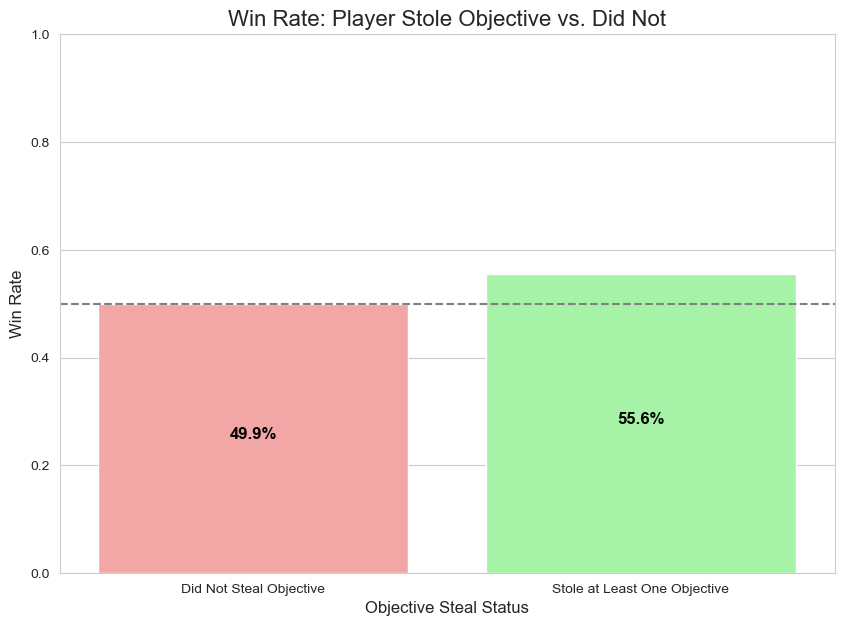


--- Interpretation ---
This analysis shows a significant increase in win rate for players who manage to steal a major objective.
A successful steal is a high-impact event that often turns the tide of a game by denying the enemy a crucial buff (like Baron or Dragon Soul) and claiming it for your own team.


In [91]:
# --- 1. Data Preparation ---
# The 'objectivesStolen' column is a count of major objectives a player stole.
# We can treat it as a categorical variable: 0 steals vs. 1 or more steals.
stole_df = cleaned_df.copy()
stole_df['did_steal_objective'] = stole_df['objectivesStolen'] > 0

# --- 2. Calculate Win Rate by Objective Steals ---
print("=== Win Rate by Stealing an Objective ===\n")

# Calculate the win rate for players who stole an objective vs. those who didn't.
win_rate_by_steal = stole_df.groupby('did_steal_objective')['win'].agg(['mean', 'count']).round(3)
win_rate_by_steal.columns = ['Win_Rate', 'Players']
win_rate_by_steal.index = ['Did Not Steal Objective', 'Stole at Least One Objective']

print("--- Win Rate by Objective Steal Status ---")
print(win_rate_by_steal)
print("\n" + "="*50 + "\n")

# Let's also see the win rate by the number of objectives stolen.
win_rate_by_steal_count = stole_df.groupby('objectivesStolen')['win'].agg(['mean', 'count']).round(3)
win_rate_by_steal_count.columns = ['Win_Rate', 'Games']
print("--- Win Rate by Number of Objectives Stolen ---")
# We show all, as stealing more than 1 is very rare and interesting to see.
print(win_rate_by_steal_count)
print("\n" + "="*50 + "\n")


# --- 3. Visualization ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(
    x=win_rate_by_steal.index,
    y=win_rate_by_steal['Win_Rate'],
    hue=win_rate_by_steal.index,
    palette=['#ff9999', '#99ff99'],
    legend=False
)

# Add plot details
ax.set_title('Win Rate: Player Stole Objective vs. Did Not', fontsize=16)
ax.set_xlabel('Objective Steal Status', fontsize=12)
ax.set_ylabel('Win Rate', fontsize=12)
ax.set_ylim(0, 1)
ax.axhline(y=0.5, color='grey', linestyle='--')

# Add percentage labels on the bars
for index, value in enumerate(win_rate_by_steal['Win_Rate']):
    ax.text(index, value / 2, f'{value:.1%}', color='black', ha='center', weight='bold', fontsize=12)

plt.show()

print("\n--- Interpretation ---")
print("This analysis shows a significant increase in win rate for players who manage to steal a major objective.")
print("A successful steal is a high-impact event that often turns the tide of a game by denying the enemy a crucial buff (like Baron or Dragon Soul) and claiming it for your own team.")


## Vision

### Vision Score 

=== Vision Control Analysis and Win Rate ===

--- Average Vision Metrics in Wins vs. Losses ---
      visionScore  wardsPlaced  stealthWardsPlaced  controlWardsPlaced  wardsKilled  visionScorePerMinute
Loss        26.12        11.45                9.07                1.34         3.06                  0.95
Win         27.87        11.91                9.02                1.58         3.34                  1.01


--- Average Vision Score by Position ---
teamPosition
UTILITY    64.53
JUNGLE     22.40
MIDDLE     16.71
TOP        15.93
BOTTOM     15.40
Name: visionScore, dtype: float64


--- Win Rate by Vision Score Ranges ---
                   Win_Rate  Games
vision_score_bins                 
0-10                  0.444  26497
11-20                 0.495  61377
21-30                 0.533  29487
31-40                 0.534  10580
41-50                 0.498   5410
51-60                 0.488   4851
60+                   0.531  17428


--- Win Rate by Number of Wards Placed ---
         

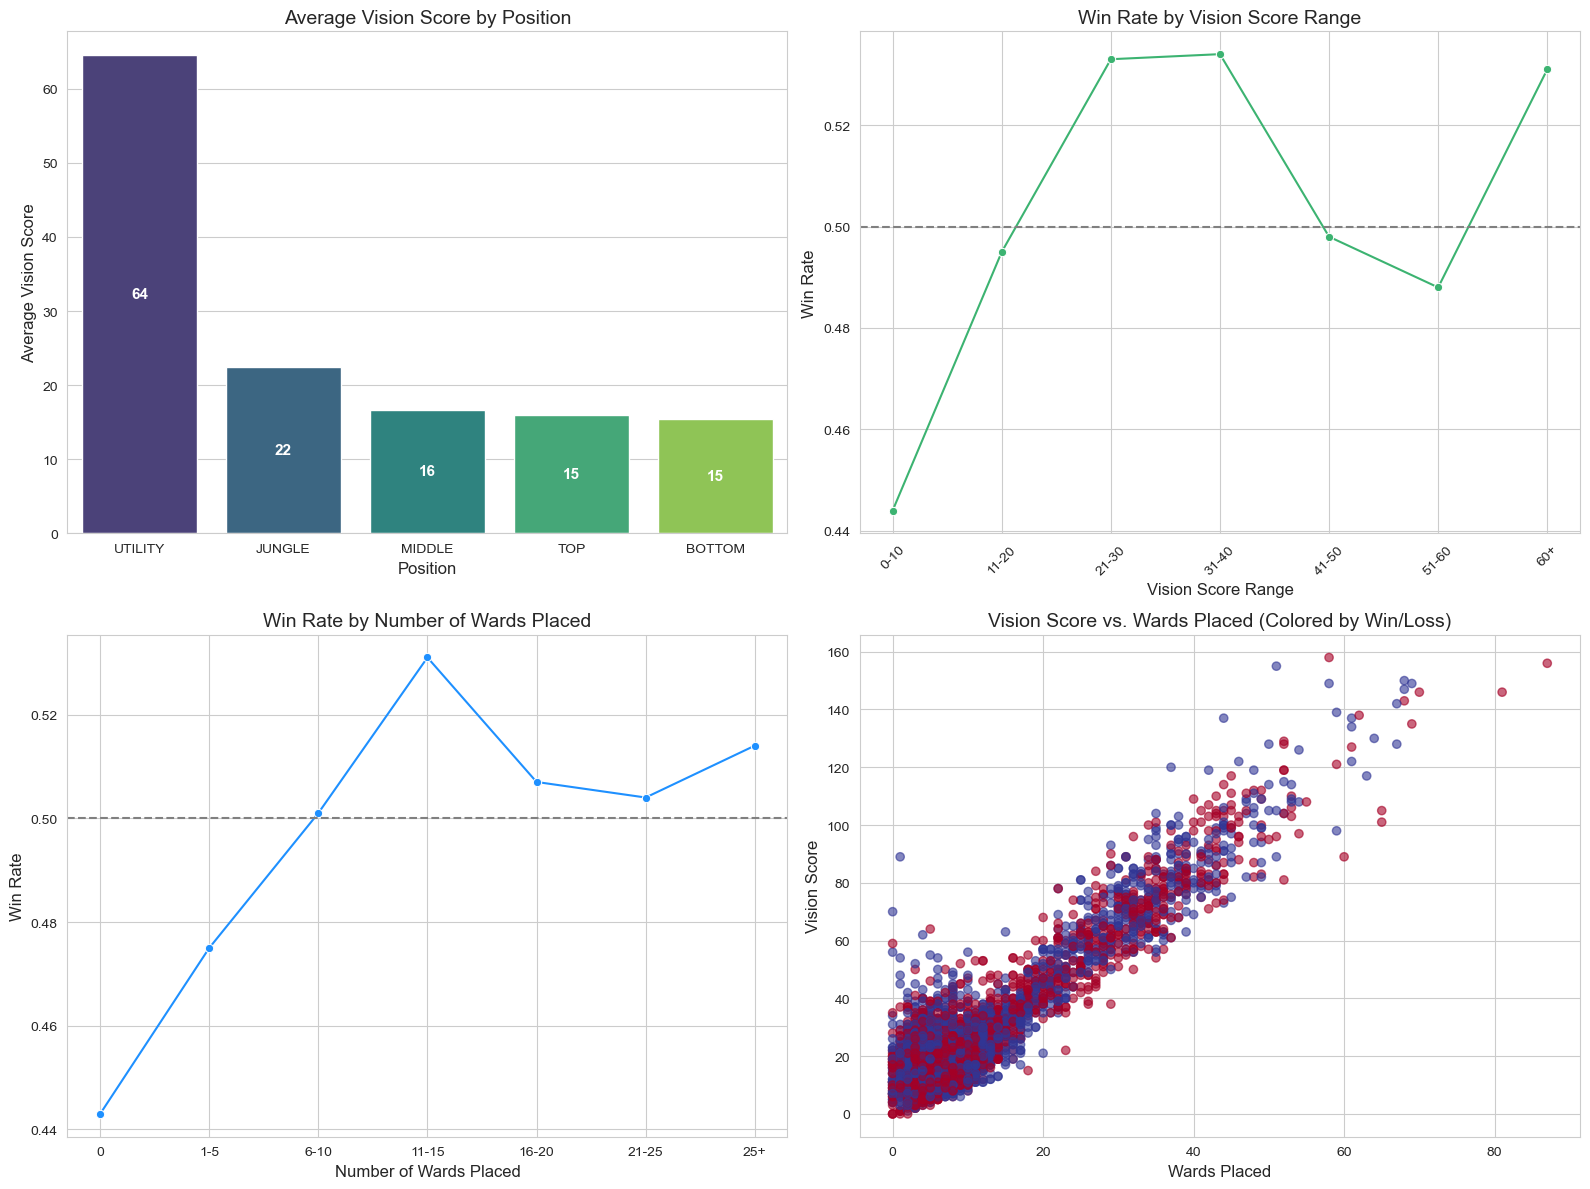

In [123]:
vision_df = cleaned_df.copy()

print("=== Vision Control Analysis and Win Rate ===\n")

# --- 2. Overall Vision Metrics for Wins vs. Losses ---
print("--- Average Vision Metrics in Wins vs. Losses ---")

# Define the key vision metrics to analyze
vision_metrics = ['visionScore', 'wardsPlaced', 'stealthWardsPlaced', 'controlWardsPlaced', 'wardsKilled', 'visionScorePerMinute']
vision_win_loss = vision_df.groupby('win')[vision_metrics].mean().round(2)
vision_win_loss.index = ['Loss', 'Win']

print(vision_win_loss)
print("\n" + "="*50 + "\n")

# --- 3. Vision Score by Position ---
print("--- Average Vision Score by Position ---")

vision_by_position = vision_df.groupby('teamPosition')['visionScore'].mean().round(2).sort_values(ascending=False)
print(vision_by_position)
print("\n" + "="*50 + "\n")

# --- 4. Win Rate by Vision Score Bins ---
print("--- Win Rate by Vision Score Ranges ---")

# Create bins for vision score to see how win probability changes.
bins_vs = [0, 10, 20, 30, 40, 50, 60, np.inf]
labels_vs = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']
vision_df['vision_score_bins'] = pd.cut(vision_df['visionScore'], bins=bins_vs, labels=labels_vs, right=True)

win_rate_by_vision = vision_df.groupby('vision_score_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_vision.columns = ['Win_Rate', 'Games']
win_rate_by_vision = win_rate_by_vision[win_rate_by_vision['Games'] >= 50]

print(win_rate_by_vision)
print("\n" + "="*50 + "\n")

# --- 5. Win Rate by Wards Placed ---
print("--- Win Rate by Number of Wards Placed ---")

bins_wards = [-1, 0, 5, 10, 15, 20, 25, np.inf]
labels_wards = ['0', '1-5', '6-10', '11-15', '16-20', '21-25', '25+']
vision_df['wards_placed_bins'] = pd.cut(vision_df['wardsPlaced'], bins=bins_wards, labels=labels_wards, right=True)

win_rate_by_wards = vision_df.groupby('wards_placed_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_wards.columns = ['Win_Rate', 'Games']
win_rate_by_wards = win_rate_by_wards[win_rate_by_wards['Games'] >= 50]

print(win_rate_by_wards)
print("\n" + "="*50 + "\n")

# --- 6. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Vision Score by Position
ax1 = axes[0, 0]
sns.barplot(x=vision_by_position.index, y=vision_by_position.values, ax=ax1, hue=vision_by_position.index, palette='viridis', legend=False)
ax1.set_title('Average Vision Score by Position', fontsize=14)
ax1.set_xlabel('Position', fontsize=12)
ax1.set_ylabel('Average Vision Score', fontsize=12)
for index, value in enumerate(vision_by_position.values):
    ax1.text(index, value / 2, f'{int(value)}', ha='center', va='center', color='white', fontsize=11, weight='bold')

# Plot 2: Win Rate by Vision Score
ax2 = axes[0, 1]
sns.lineplot(x=win_rate_by_vision.index, y=win_rate_by_vision['Win_Rate'], ax=ax2, marker='o', color='mediumseagreen')
ax2.set_title('Win Rate by Vision Score Range', fontsize=14)
ax2.set_xlabel('Vision Score Range', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Win Rate by Wards Placed
ax3 = axes[1, 0]
sns.lineplot(x=win_rate_by_wards.index, y=win_rate_by_wards['Win_Rate'], ax=ax3, marker='o', color='dodgerblue')
ax3.set_title('Win Rate by Number of Wards Placed', fontsize=14)
ax3.set_xlabel('Number of Wards Placed', fontsize=12)
ax3.set_ylabel('Win Rate', fontsize=12)
ax3.axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: Vision Score vs. Wards Placed Scatter
ax4 = axes[1, 1]
# Sample a subset of data to avoid overcrowding
sample_size = min(5000, len(vision_df))
sample_data = vision_df.sample(n=sample_size, random_state=42)
ax4.scatter(sample_data['wardsPlaced'], sample_data['visionScore'], alpha=0.6, c=sample_data['win'], cmap='RdYlBu')
ax4.set_title('Vision Score vs. Wards Placed (Colored by Win/Loss)', fontsize=14)
ax4.set_xlabel('Wards Placed', fontsize=12)
ax4.set_ylabel('Vision Score', fontsize=12)

plt.tight_layout()
plt.show()


In [110]:
# --- Vision Score Correlation with Win Rate by Role ---

print("=== Vision Score Correlation with Win Rate by Role ===\n")

# Get unique roles
roles = sorted(cleaned_df['teamPosition'].unique())

# Calculate correlation for each role
vision_correlations = {}

for role in roles:
    # Filter data for the current role
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    
    # Calculate correlation between vision score and win rate
    # Convert win to numeric (True=1, False=0) for correlation calculation
    correlation = role_data['visionScore'].corr(role_data['win'].astype(int))
    
    # Store the result
    vision_correlations[role] = correlation
    
    # Print the result
    print(f"{role}: {correlation:.4f}")

print()

# Sort roles by correlation strength (absolute value)
sorted_correlations = sorted(vision_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("--- Roles Ranked by Vision Score Correlation Strength ---")
for role, corr in sorted_correlations:
    print(f"{role}: {corr:.4f}")


=== Vision Score Correlation with Win Rate by Role ===

BOTTOM: 0.0682
JUNGLE: 0.0919
MIDDLE: 0.0773
TOP: 0.0555
UTILITY: 0.0682

--- Roles Ranked by Vision Score Correlation Strength ---
JUNGLE: 0.0919
MIDDLE: 0.0773
UTILITY: 0.0682
BOTTOM: 0.0682
TOP: 0.0555


### Ward Types (Stealth Wards vs Control Wards)

=== Win Rate Correlation: Stealth Wards vs. Control Wards ===

--- Overall Statistics for Ward Types ---
       stealthWardsPlaced  controlWardsPlaced
count       155690.000000       155690.000000
mean             9.047479            1.460640
std              9.740335            2.240075
min              0.000000            0.000000
25%              4.000000            0.000000
50%              5.000000            1.000000
75%             10.000000            2.000000
max             85.000000           30.000000


--- Win Rate by Number of Stealth Wards Placed ---
                   Win_Rate  Games
stealth_ward_bins                 
0                     0.487   4514
1-3                   0.506  33314
4-6                   0.504  57258
7-9                   0.475  21444
10-12                 0.496   9382
13-15                 0.515   3649
16-18                 0.512   2886
19-21                 0.526   3271
22+                   0.501  19972


--- Win Rate by Number of Control Wards P

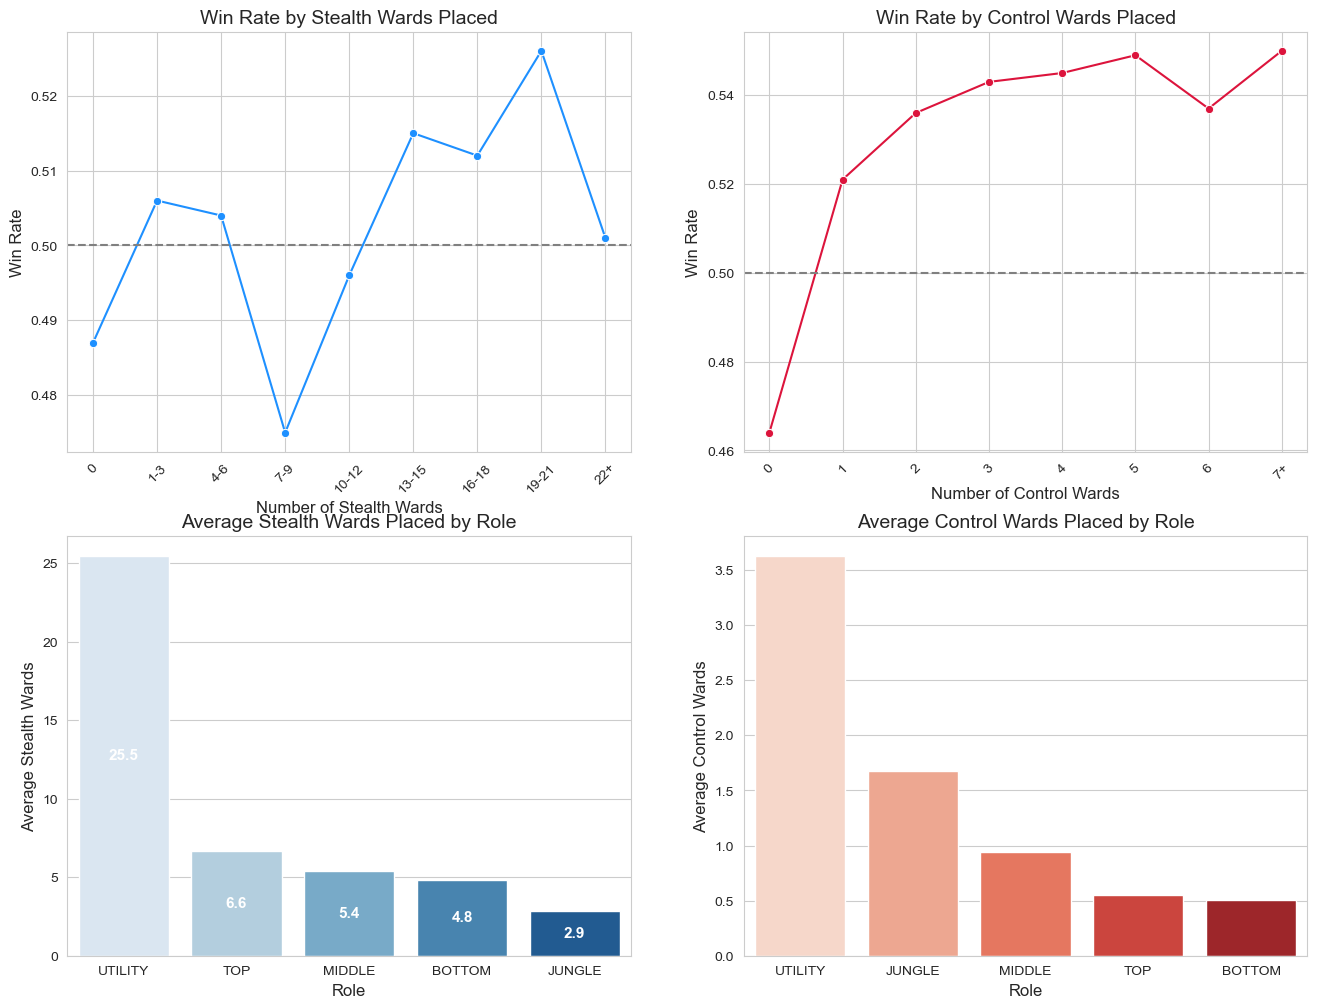

In [124]:
# --- Stealth Wards vs. Control Wards Analysis ---

print("=== Win Rate Correlation: Stealth Wards vs. Control Wards ===\n")

# --- 1. Overall Statistics for Both Ward Types ---
print("--- Overall Statistics for Ward Types ---")

ward_stats = cleaned_df[['stealthWardsPlaced', 'controlWardsPlaced']].describe()
print(ward_stats)
print("\n" + "="*50 + "\n")

# --- 2. Win Rate by Stealth Wards Placed ---
print("--- Win Rate by Number of Stealth Wards Placed ---")

# Create bins for stealth wards
bins_stealth = [-1, 0, 3, 6, 9, 12, 15, 18, 21, np.inf]
labels_stealth = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22+']
cleaned_df['stealth_ward_bins'] = pd.cut(cleaned_df['stealthWardsPlaced'], bins=bins_stealth, labels=labels_stealth, right=True)

win_rate_stealth = cleaned_df.groupby('stealth_ward_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_stealth.columns = ['Win_Rate', 'Games']
win_rate_stealth = win_rate_stealth[win_rate_stealth['Games'] >= 50]

print(win_rate_stealth)
print("\n" + "="*50 + "\n")

# --- 3. Win Rate by Control Wards Placed ---
print("--- Win Rate by Number of Control Wards Placed ---")

# Create bins for control wards
bins_control = [-1, 0, 1, 2, 3, 4, 5, 6, np.inf]
labels_control = ['0', '1', '2', '3', '4', '5', '6', '7+']
cleaned_df['control_ward_bins'] = pd.cut(cleaned_df['controlWardsPlaced'], bins=bins_control, labels=labels_control, right=True)

win_rate_control = cleaned_df.groupby('control_ward_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_control.columns = ['Win_Rate', 'Games']
win_rate_control = win_rate_control[win_rate_control['Games'] >= 50]

print(win_rate_control)
print("\n" + "="*50 + "\n")

# --- 4. Correlation Analysis by Role ---
print("--- Win Rate Correlation by Role ---")

roles = sorted(cleaned_df['teamPosition'].unique())

print("Stealth Wards Correlation with Win Rate:")
for role in roles:
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    corr_stealth = role_data['stealthWardsPlaced'].corr(role_data['win'].astype(int))
    print(f"{role}: {corr_stealth:.4f}")

print("\nControl Wards Correlation with Win Rate:")
for role in roles:
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    corr_control = role_data['controlWardsPlaced'].corr(role_data['win'].astype(int))
    print(f"{role}: {corr_control:.4f}")

print("\n" + "="*50 + "\n")

# --- 5. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_style("whitegrid")

# Plot 1: Win Rate by Stealth Wards
ax1 = axes[0, 0]
sns.lineplot(x=win_rate_stealth.index, y=win_rate_stealth['Win_Rate'], ax=ax1, marker='o', color='dodgerblue')
ax1.set_title('Win Rate by Stealth Wards Placed', fontsize=14)
ax1.set_xlabel('Number of Stealth Wards', fontsize=12)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.axhline(y=0.5, color='grey', linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Win Rate by Control Wards
ax2 = axes[0, 1]
sns.lineplot(x=win_rate_control.index, y=win_rate_control['Win_Rate'], ax=ax2, marker='o', color='crimson')
ax2.set_title('Win Rate by Control Wards Placed', fontsize=14)
ax2.set_xlabel('Number of Control Wards', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Stealth Wards by Role
ax3 = axes[1, 0]
stealth_by_role = cleaned_df.groupby('teamPosition')['stealthWardsPlaced'].mean().round(2).sort_values(ascending=False)
sns.barplot(x=stealth_by_role.index, y=stealth_by_role.values, ax=ax3, hue=stealth_by_role.index, palette='Blues', legend=False)
ax3.set_title('Average Stealth Wards Placed by Role', fontsize=14)
ax3.set_xlabel('Role', fontsize=12)
ax3.set_ylabel('Average Stealth Wards', fontsize=12)
for index, value in enumerate(stealth_by_role.values):
    ax3.text(index, value/2, f'{value:.1f}', ha='center', va='center', color='white', fontsize=11, weight='bold')

# Plot 4: Control Wards by Role
ax4 = axes[1, 1]
control_by_role = cleaned_df.groupby('teamPosition')['controlWardsPlaced'].mean().round(2).sort_values(ascending=False)
sns.barplot(x=control_by_role.index, y=control_by_role.values, ax=ax4, hue=control_by_role.index, palette='Reds', legend=False)
ax4.set_title('Average Control Wards Placed by Role', fontsize=14)
ax4.set_xlabel('Role', fontsize=12)
ax4.set_ylabel('Average Control Wards', fontsize=12)
for index, value in enumerate(control_by_role.values):
    ax4.text

### Wards Killed, Vision Score/M, Ward Takedowns Before 20M, and Vision Score Advantage

In [106]:
# --- Specific Vision Metrics Correlation with Win Rate by Role ---
print("=== Vision Metrics Correlation with Win Rate by Role ===\n")
# Define the specific vision metrics to analyze
vision_metrics = [
    'wardsKilled',
    'visionScorePerMinute', 
    'wardTakedownsBefore20M',
    'visionScoreAdvantageLaneOpponent'
]

# Get unique roles
roles = sorted(cleaned_df['teamPosition'].unique())

# Create a DataFrame to store all correlations
correlation_results = {}

for role in roles:
    # Filter data for the current role
    role_data = cleaned_df[cleaned_df['teamPosition'] == role]
    
    # Calculate correlation for each vision metric
    role_correlations = {}
    for metric in vision_metrics:
        # Check if the metric exists and has non-null values
        if metric in role_data.columns and role_data[metric].notna().sum() > 0:
            correlation = role_data[metric].corr(role_data['win'].astype(int))
            role_correlations[metric] = correlation
        else:
            role_correlations[metric] = np.nan
    
    correlation_results[role] = role_correlations

# Display results in a formatted table
print("--- Correlation Coefficients by Role and Metric ---")
print("(Positive = Higher metric = Higher win rate)")
print("(Negative = Higher metric = Lower win rate)")
print()

# Print header
print(f"{'Role':<12}", end="")
for metric in vision_metrics:
    print(f"{metric:<25}", end="")
print()

# Print separator
print("-" * 120)

# Print data for each role
for role in roles:
    print(f"{role:<12}", end="")
    for metric in vision_metrics:
        corr = correlation_results[role][metric]
        if not np.isnan(corr):
            print(f"{corr:<25.4f}", end="")
        else:
            print(f"{'N/A':<25}", end="")
    print()
print()
# Find the strongest correlations for each metric
print("--- Strongest Correlations by Metric ---")
for metric in vision_metrics:
    print(f"\n{metric}:")
    metric_correlations = [(role, correlation_results[role][metric]) for role in roles]
    # Sort by absolute correlation value, excluding NaN
    valid_correlations = [(role, corr) for role, corr in metric_correlations if not np.isnan(corr)]
    sorted_correlations = sorted(valid_correlations, key=lambda x: abs(x[1]), reverse=True)
    
    for role, corr in sorted_correlations:
        print(f"  {role}: {corr:.4f}")

print("Metric explanations:")
print("- wardsKilled: Number of enemy wards destroyed")
print("- visionScorePerMinute: Vision score normalized by game duration")
print("- wardTakedownsBefore20M: Wards destroyed before 20 minutes")
print("- visionScoreAdvantageLaneOpponent: Vision score difference vs. lane opponent")

=== Vision Metrics Correlation with Win Rate by Role ===

--- Correlation Coefficients by Role and Metric ---
(Positive = Higher metric = Higher win rate)
(Negative = Higher metric = Lower win rate)

Role        wardsKilled              visionScorePerMinute     wardTakedownsBefore20M   visionScoreAdvantageLaneOpponent
------------------------------------------------------------------------------------------------------------------------
BOTTOM      0.0834                   0.0962                   0.0539                   0.1217                   
JUNGLE      0.0187                   0.1334                   0.0005                   0.1896                   
MIDDLE      0.0786                   0.1124                   0.0504                   0.1416                   
TOP         0.0507                   0.0829                   0.0195                   0.0729                   
UTILITY     0.0541                   0.1218                   0.0513                   0.1682              

In [121]:
# --- Describe visionScoreAdvantageLaneOpponent Column ---
print("=== Statistical Description of visionScoreAdvantageLaneOpponent ===\n")

# Use pandas describe() function to get comprehensive statistics
description = cleaned_df['visionScoreAdvantageLaneOpponent'].describe()

print(description)

=== Statistical Description of visionScoreAdvantageLaneOpponent ===

count    155690.000000
mean          0.112250
std           0.698443
min          -1.000000
25%          -0.236794
50%          -0.000009
75%           0.310224
max         117.283699
Name: visionScoreAdvantageLaneOpponent, dtype: float64


=== Vision Metrics vs. Win Rate by Role (Visualized) ===



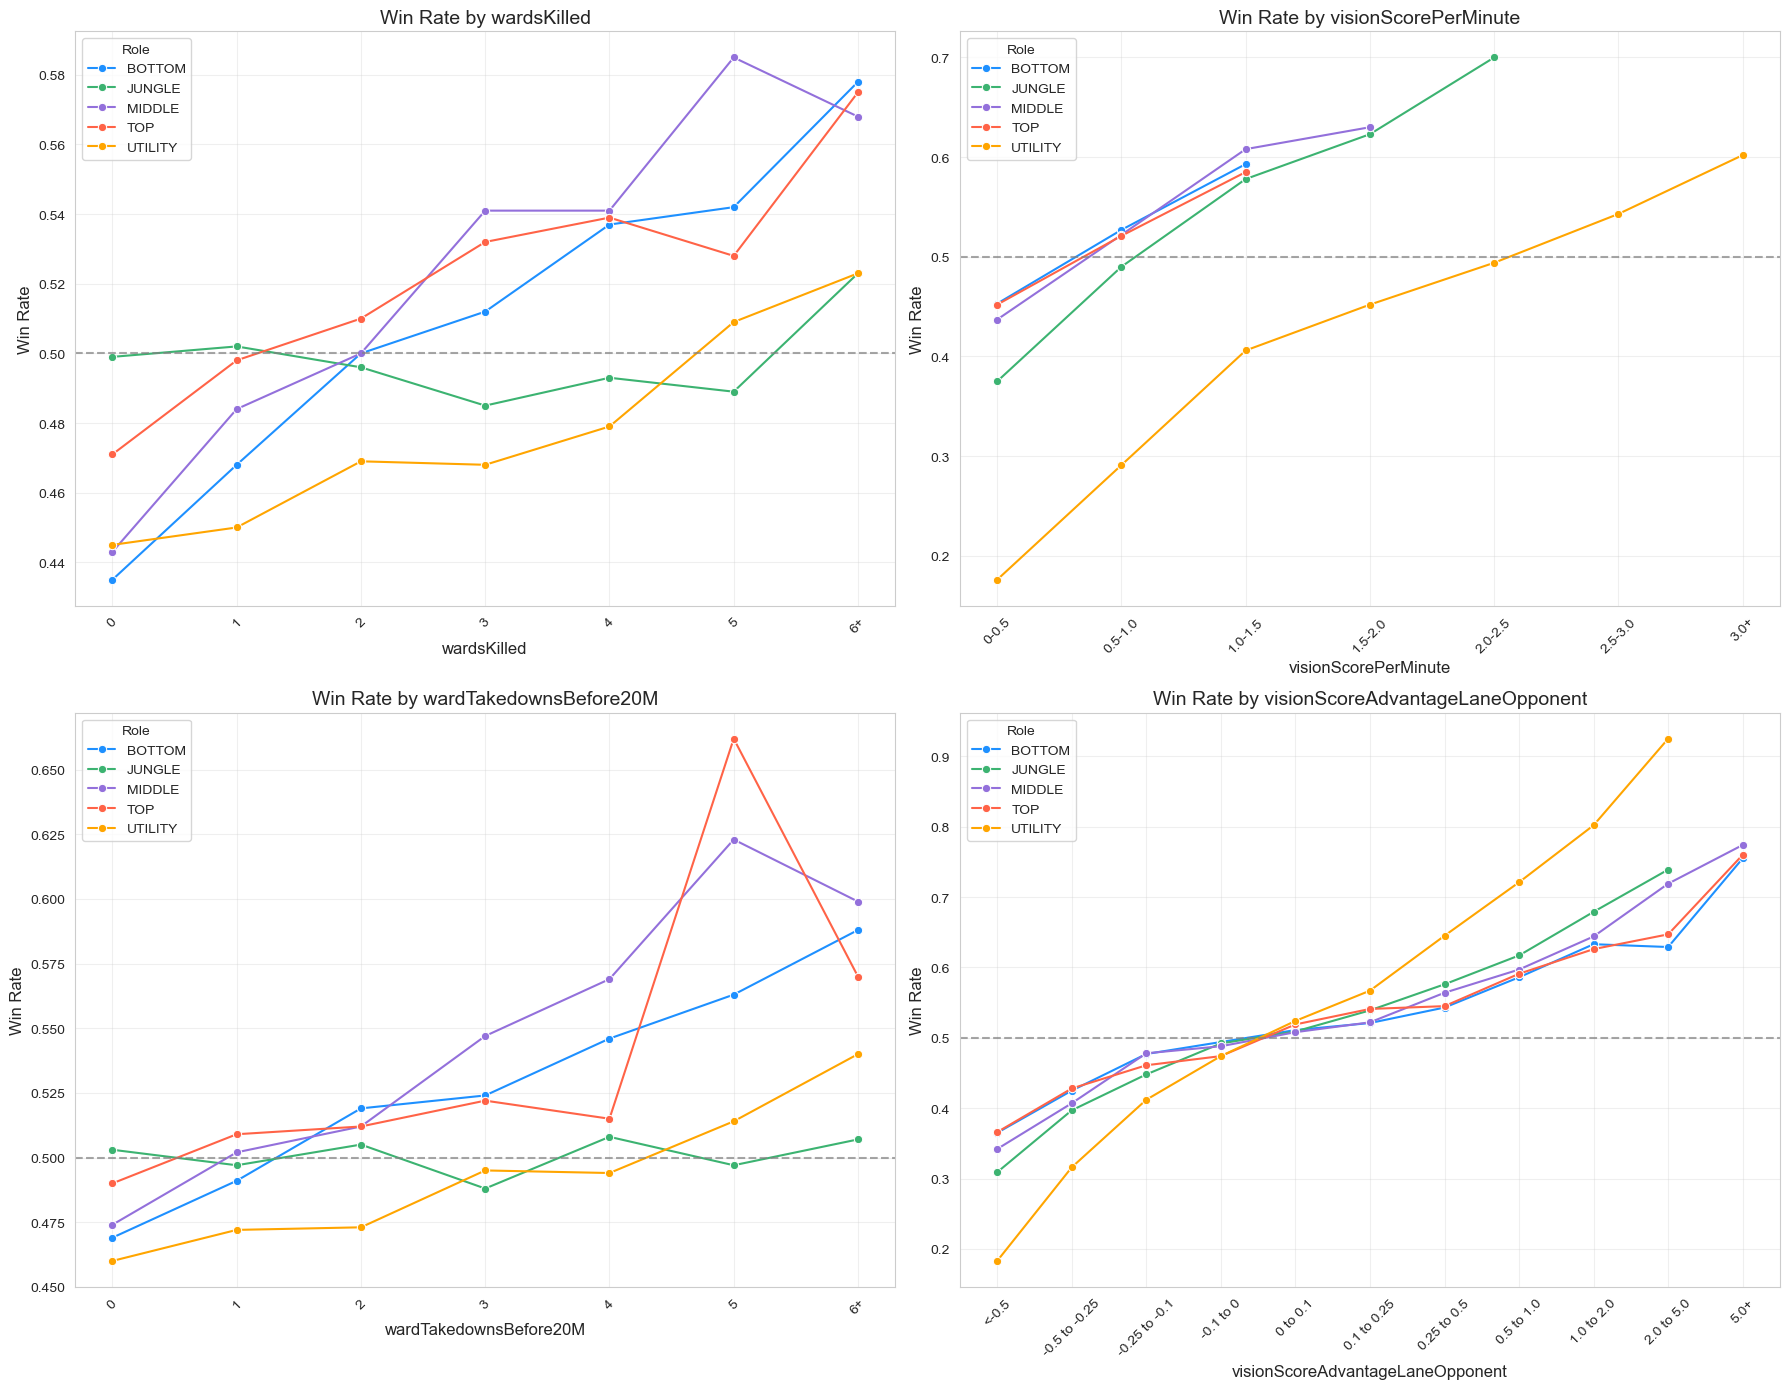

In [122]:
# --- Vision Metrics Visualization by Role (Corrected) ---

print("=== Vision Metrics vs. Win Rate by Role (Visualized) ===\n")

# Define the specific vision metrics to analyze
vision_metrics = [
    'wardsKilled',
    'visionScorePerMinute', 
    'wardTakedownsBefore20M',
    'visionScoreAdvantageLaneOpponent'
]

# Get unique roles
roles = sorted(cleaned_df['teamPosition'].unique())
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_style("whitegrid")

# Flatten axes for easier iteration
axes = axes.flatten()

# Create bins for each metric to analyze win rate across ranges
for i, metric in enumerate(vision_metrics):
    ax = axes[i]
    
    # Create appropriate bins for each metric
    if metric == 'wardsKilled':
        bins = [-1, 0, 1, 2, 3, 4, 5, np.inf]
        labels = ['0', '1', '2', '3', '4', '5', '6+']
    elif metric == 'visionScorePerMinute':
        bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, np.inf]
        labels = ['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0+']
    elif metric == 'wardTakedownsBefore20M':
        bins = [-1, 0, 1, 2, 3, 4, 5, np.inf]
        labels = ['0', '1', '2', '3', '4', '5', '6+']
    elif metric == 'visionScoreAdvantageLaneOpponent':
        # --- BINS BASED ON ACTUAL DATA DISTRIBUTION ---
        # Using percentiles and standard deviations to create meaningful ranges
        bins = [-np.inf, -0.5, -0.25, -0.1, 0, 0.1, 0.25, 0.5, 1.0, 2.0, 5.0, np.inf]
        labels = ['<-0.5', '-0.5 to -0.25', '-0.25 to -0.1', '-0.1 to 0', '0 to 0.1', '0.1 to 0.25', '0.25 to 0.5', '0.5 to 1.0', '1.0 to 2.0', '2.0 to 5.0', '5.0+']
    
    # Create bins for the current metric
    cleaned_df[f'{metric}_bins'] = pd.cut(cleaned_df[metric], bins=bins, labels=labels, right=True)
    
    # Plot win rate by metric bins for each role
    for role in roles:
        # Filter data for the current role
        role_data = cleaned_df[cleaned_df['teamPosition'] == role].copy()
        
        # Calculate win rate by bins for this role
        win_rate_by_bins = role_data.groupby(f'{metric}_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
        win_rate_by_bins.columns = ['Win_Rate', 'Games']
        
        # Filter for bins with enough games for statistical significance
        min_games = 20 if metric == 'visionScoreAdvantageLaneOpponent' else 30
        win_rate_by_bins = win_rate_by_bins[win_rate_by_bins['Games'] >= min_games]
        
        if not win_rate_by_bins.empty:
            sns.lineplot(
                x=win_rate_by_bins.index,
                y=win_rate_by_bins['Win_Rate'],
                ax=ax,
                label=role,
                color=colors[role],
                marker='o'
            )
    
    # Customize the plot
    ax.set_title(f'Win Rate by {metric}', fontsize=14)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel('Win Rate', fontsize=12)
    ax.axhline(y=0.5, color='grey', linestyle='--', alpha=0.7)
    ax.legend(title='Role')
    
    # Rotate x-axis labels for better readability
    if metric == 'visionScoreAdvantageLaneOpponent':
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=45)
    
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clean up temporary columns
for metric in vision_metrics:
    if f'{metric}_bins' in cleaned_df.columns:
        cleaned_df.drop(columns=[f'{metric}_bins'], inplace=True)

**Key Takeaway**
- Vision Score's correlation with winning appears much lower than I had expected.

## Communication

# EDA (Non-Role Specific / Trivial)

1. Spell Casts 
    - What abilities gets pressed the most (Q)
    - How does summoner spell usage correlate with win/loss
2. Fist Bump Participation
    - Is there a correlation with players who likes to fist bump and win/loss

# Modelling 